<a href="https://colab.research.google.com/github/casblood18/Painting-3D-Game-Objects-Using-Generative-AI/blob/main/Painting%203D%20Game%20Objects%20Using%20Generative%20AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Stuff


In [ ]:
!pip list

In [ ]:
import sys
print(sys.platform)

In [ ]:
!pip install torch==2.1.2 torchvision==0.16.2 torchaudio==2.1.2 --index-url https://download.pytorch.org/whl/cu121
print(torch.__version__)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.enable_model_cpu_offload()

# prepare image
im = load_image("/content/drive/MyDrive/Colab Notebooks/Project_1/cow/cow_texture.png")

prompt = "minecraft cow 2d texture map"

# pass prompt and image to pipeline
image = pipeline(prompt, image=im).images[0]
make_image_grid([image], rows=1, cols=1)

In [ ]:
from diffusers.utils import load_image, make_image_grid
plt.figure(figsize=(10, 10))
plt.imshow(target_rgb[0, ..., :3].cpu().numpy())
plt.axis("off");

###Dependencies


In [ ]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("2.2.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'
# ==================
# install Diffusers
# ==================
!source '/content/drive/My Drive/dev/colab_env/bin/activate'
!pip install accelerate
!pip install "git+https://github.com/huggingface/diffusers"

# ==================
# install OpenCV
# ==================
!pip install opencv-python

In [ ]:
import cv2
import pytorch3d
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

# Util function for loading meshes
from pytorch3d.io import load_objs_as_meshes, load_obj, save_obj

# Week 4 Dependencies
from pytorch3d.loss import (
    chamfer_distance,
    mesh_edge_loss,
    mesh_laplacian_smoothing,
    mesh_normal_consistency,
)

# Data structures and functions for rendering
from pytorch3d.structures import Meshes
from pytorch3d.vis.plotly_vis import AxisArgs, plot_batch_individually, plot_scene
from pytorch3d.vis.texture_vis import texturesuv_image_matplotlib
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras,
    PointLights,
    DirectionalLights,
    Materials,
    RasterizationSettings,
    MeshRenderer,
    MeshRasterizer,
    SoftPhongShader,
    SoftSilhouetteShader,
    TexturesUV,
    TexturesVertex
)

# add path for demo utils functions
import sys
import os
sys.path.append(os.path.abspath(''))

!wget https://raw.githubusercontent.com/facebookresearch/pytorch3d/main/docs/tutorials/utils/plot_image_grid.py
from plot_image_grid import image_grid

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

--2024-04-21 03:08:23--  https://raw.githubusercontent.com/facebookresearch/pytorch3d/main/docs/tutorials/utils/plot_image_grid.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1608 (1.6K) [text/plain]
Saving to: ‘plot_image_grid.py’

plot_image_grid.py  100%[===================>]   1.57K  --.-KB/s    in 0s      

2024-04-21 03:08:38 (29.7 MB/s) - ‘plot_image_grid.py’ saved [1608/1608]



In [ ]:
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras,
    PointLights,
    DirectionalLights,
    Materials,
    RasterizationSettings,
    MeshRenderer,
    MeshRasterizer,
    SoftPhongShader,
    SoftSilhouetteShader,
    TexturesUV,
    TexturesVertex
)

###Project


In [ ]:
import torch
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

# Set paths
obj_filename = "/content/drive/MyDrive/Colab Notebooks/Project_1/cow/cow.obj"

# Load obj file
mesh = load_objs_as_meshes([obj_filename], device=device)
# images = renderer(mesh)
plt.figure(figsize=(10, 10))
plt.imshow(rendered_image[0, ..., :3].cpu().numpy())
plt.axis("off");

plt.figure(figsize=(7,7))
texture_image=mesh.textures.maps_padded()
plt.imshow(texture_image.squeeze().cpu().numpy())
plt.axis("off");

In [ ]:
print(text)

NameError: name 'image_predicted' is not defined

In [ ]:
# Initialize a camera.
# With world coordinates +Y up, +X left and +Z in, the front of the cow is facing the -Z direction.
# So we move the camera by 180 in the azimuth direction so it is facing the front of the cow.
R, T = look_at_view_transform(2.7, 0, 225)
side_view_cameras = FoVPerspectiveCameras(device=device, R=R, T=T)

R, T = look_at_view_transform(2.7, 0, 180)
front_view_cameras = FoVPerspectiveCameras(device=device, R=R, T=T)
# Define the settings for rasterization and shading. Here we set the output image to be of size
# 512x512. As we are rendering images for visualization purposes only we will set faces_per_pixel=1
# and blur_radius=0.0. We also set bin_size and max_faces_per_bin to None which ensure that
# the faster coarse-to-fine rasterization method is used. Refer to rasterize_meshes.py for
# explanations of these parameters. Refer to docs/notes/renderer.md for an explanation of
# the difference between naive and coarse-to-fine rasterization.
raster_settings = RasterizationSettings(
    image_size=512,
    blur_radius=0.0,
    faces_per_pixel=1,
)

# Place a point light in front of the object. As mentioned above, the front of the cow is facing the
# -z direction.
lights = PointLights(device=device, location=[[90.0, 0.0, 0.0]])

# Create a Phong renderer by composing a rasterizer and a shader. The textured Phong shader will
# interpolate the texture uv coordinates for each vertex, sample from a texture image and
# apply the Phong lighting model
renderer = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=side_view_cameras,
        raster_settings=raster_settings
    ),
    shader=SoftPhongShader(
        device=device,
        cameras=side_view_cameras,
        lights=lights
    )
)

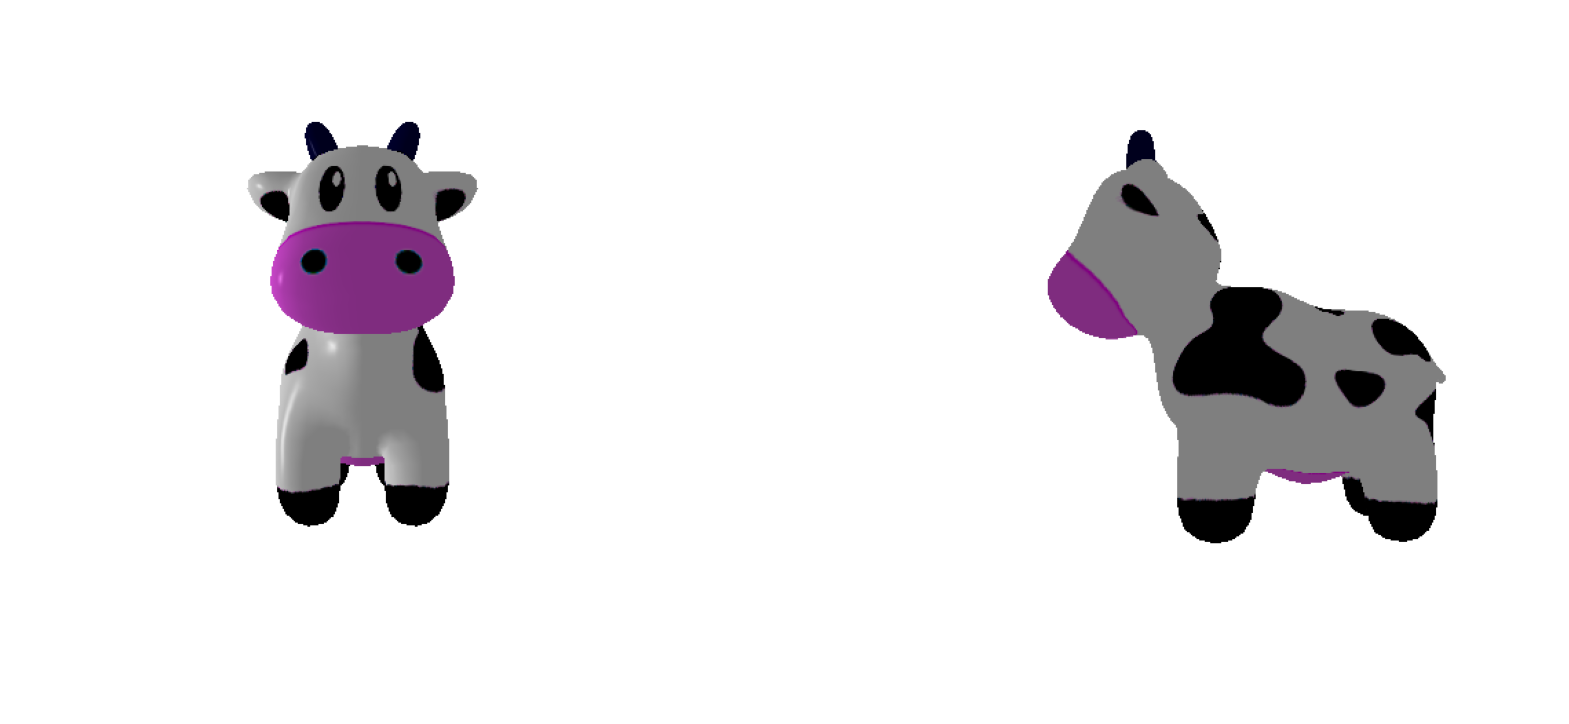

In [ ]:
# Week 2: Pytorch3D Textures and Rendering
verts, face, aux = load_obj("/content/drive/MyDrive/Colab Notebooks/Project_1/cow/cow.obj", load_textures=True)
faces_uvs = face.textures_idx.to(device)
verts_uvs = aux.verts_uvs.to(device)

# Load pink textured cow image
im = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Project_1/cow/cow_texture_pink.png")
im = im.astype(np.float32)
im = torch.from_numpy(im/255).to(device)

pink_images = []

# Front view of pink textured cow
renderer.rasterizer.cameras = front_view_cameras
renderer.shader.cameras = front_view_cameras

# Change the texture map to the pink cow
mesh.textures = TexturesUV(maps=[im], faces_uvs=[faces_uvs], verts_uvs=[verts_uvs])
rendered_image = renderer(mesh)
pink_images.append(rendered_image[0, ..., :3].cpu().numpy())

# Side view of pink textured cow
renderer.rasterizer.cameras = side_view_cameras
renderer.shader.cameras = side_view_cameras

# Render with new camera position
rendered_image = renderer(mesh)
pink_images.append(rendered_image[0, ..., :3].cpu().numpy())

# Plot the rendered images
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
for i, image in enumerate(pink_images):
    axes[i].imshow(image)
    axes[i].axis("off")
plt.show()

In [ ]:
# Week 3: Generate new texture images using [SD] vs [ControlNet]
load_images = []

# File paths of the ControlNet images with Canny model
image_paths = [
    "/content/drive/MyDrive/Colab Notebooks/Project_1/cow/cow_texture_dark.png",
    "/content/drive/MyDrive/Colab Notebooks/Project_1/cow/blue.png",
    "/content/drive/MyDrive/Colab Notebooks/Project_1/cow/cow_texture_candy.png",
    "/content/drive/MyDrive/Colab Notebooks/Project_1/cow/cow_kingdom.png"
]
LOAD_IMAGES_SIZE = len(image_paths)

# Load the images, normalize them, and add them to the list
for image_path in image_paths:
    image = cv2.imread(image_path)
    image = image.astype(np.float32)
    image = torch.from_numpy(image/255).to(device)
    load_images.append(image)

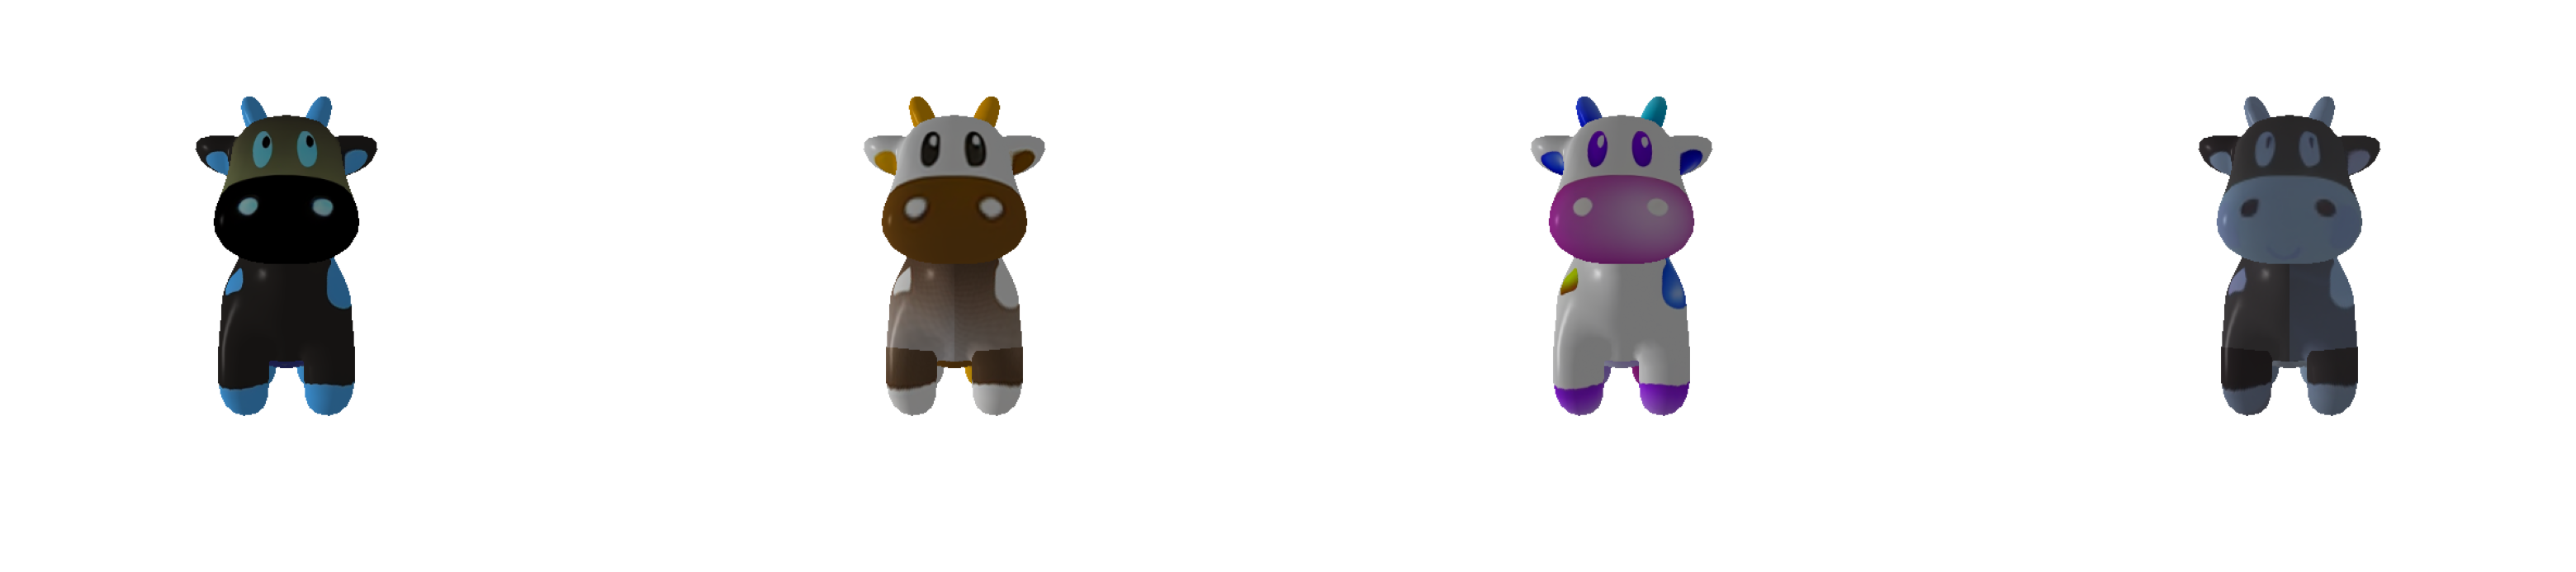

In [ ]:
renderer.rasterizer.cameras = front_view_cameras
renderer.shader.cameras = front_view_cameras
images = []

# Render each image and append it to the images list
for i in range(LOAD_IMAGES_SIZE):
  mesh.textures = TexturesUV(maps=[load_images[i]], faces_uvs=[faces_uvs], verts_uvs=[verts_uvs])
  rendered_image = renderer(mesh)
  images.append(rendered_image[0, ..., :3].cpu().numpy())

# Plot the images
fig, axes = plt.subplots(1, 4, figsize=(40, 10))
for i, image in enumerate(images):
  axes[i].imshow(image)
  axes[i].axis("off")
plt.show()

### Week 4


In [ ]:
import torch sdsds
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

# Set paths
obj_filename = "/content/drive/MyDrive/Colab Notebooks/Project_1/cow/cow.obj"

# Load obj file
mesh = load_objs_as_meshes([obj_filename], device=device)

# Get the obj values
verts, face, aux = load_obj("/content/drive/MyDrive/Colab Notebooks/Project_1/cow/cow.obj")
faces_uvs = face.textures_idx.to(device)
verts_uvs = aux.verts_uvs.to(device)

In [ ]:
# Initialize a camera.
# With world coordinates +Y up, +X left and +Z in, the front of the cow is facing the -Z direction.
# So we move the camera by 180 in the azimuth direction so it is facing the front of the cow.
R, T = look_at_view_transform(2.7, 0, 225)
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)

raster_settings = RasterizationSettings(
    image_size=512,
    blur_radius=0.0,
    faces_per_pixel=1,
)

# Place a point light in front of the object. As mentioned above, the front of the cow is facing the
# -z direction.
lights = PointLights(device=device, location=[[90.0, 0.0, 0.0]])

# Create a Phong renderer by composing a rasterizer and a shader. The textured Phong shader will
# interpolate the texture uv coordinates for each vertex, sample from a texture image and
# apply the Phong lighting model
renderer = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=cameras,
        raster_settings=raster_settings
    ),
    shader=SoftPhongShader(
        device=device,
        cameras=cameras,
        lights=lights
    )
)

In [ ]:
from diffusers.utils import load_image, make_image_grid
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch
from PIL import Image
import cv2
import numpy as np

#rendered the image and format it to be passable through the controlnet pipeline
rendered_image = renderer(mesh)
image = rendered_image[0, ..., :3].detach().cpu().numpy()
image = image*255
image = image.astype(np.uint8)
image = image.squeeze()
image = image[:, :, :3]
low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)


controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16, use_safetensors=True)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16, use_safetensors=True
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

output = pipe(
    "anime", image=canny_image
).images[0]
make_image_grid([canny_image, output], rows=1, cols=2)


In [ ]:
# Number of optimization steps
Niter = 30000
# Plot period for the losses
plot_period = 5000

# getting the learnable tensor for the cow texture map
target = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Project_1/cow/cow_texture.png")
target = target.astype(np.float32)
target = torch.from_numpy(target/255).to(device)
verts_rgb = torch.ones(target.shape, device=device, requires_grad=True)

# The optimizer
optimizer = torch.optim.SGD([verts_rgb], lr=100.0, momentum=0.9)

In [ ]:
from PIL import Image
from torchvision import transforms

# Format the Image from the ControlNet output
target_rgb = transforms.ToTensor()(output)
target_rgb = target_rgb.unsqueeze(0)
target_rgb = target_rgb.permute(0, 2, 3, 1)
target_rgb = target_rgb[...,:3]

# Check if GPU is available
if torch.cuda.is_available():
    # Set tensor to GPU
    target_rgb = target_rgb.to('cuda')


In [ ]:
# Show a visualization comparing the rendered predicted mesh to the ground truth
# mesh
def visualize_prediction(predicted_mesh, renderer=renderer,
                         target_image=verts_rgb, title='',
                         silhouette=False):
    with torch.no_grad():
      predicted_images = renderer(predicted_mesh)
      plt.figure(figsize=(20, 10))
      plt.subplot(1, 2, 1)
      plt.imshow(predicted_images[0, ...,:3 ].cpu().detach().numpy())

      plt.subplot(1, 2, 2)
      plt.imshow(target_image.cpu().detach().numpy())
      plt.title(title)
      plt.axis("off")


In [ ]:
loop = tqdm(range(Niter))

for i in loop:
    # Initialize optimizer
    optimizer.zero_grad()
    # Update the new texture map
    mesh.textures = TexturesUV(maps=[verts_rgb], faces_uvs=[faces_uvs], verts_uvs=[verts_uvs])

    # Render the new cow for to compute the new loss and changing RGBA -> RGB
    images_predicted = renderer(mesh, cameras=cameras, lights=lights)
    predicted_rgb = images_predicted[...,:3]

    # Loss Function
    loss_rgb = ((predicted_rgb - target_rgb) ** 2).mean()

    # Visualize the total loss
    loop.set_description("total_loss = %.6f" % loss_rgb)

    # Plot mesh
    if i % plot_period == 0:
      print(loss_rgb)
      visualize_prediction(mesh, renderer=renderer, title="iter: %d" % i, silhouette=False)

    # Optimization step
    loss_rgb.backward()
    optimizer.step()

In [ ]:
visualize_prediction(mesh, renderer=renderer, silhouette=False)


In [ ]:
from pytorch3d.io import save_obj

final_verts, final_faces = mesh.get_mesh_verts_faces(0)
final_obj = os.path.join('./', 'final_model.obj')
save_obj("/content/drive/MyDrive/Colab Notebooks/Project_1/cow/final_model.obj", final_verts, final_faces)

###Test


In [ ]:
import os
import torch
import matplotlib.pyplot as plt

from pytorch3d.utils import ico_sphere
import numpy as np
from tqdm.notebook import tqdm

# Util function for loading meshes
from pytorch3d.io import load_objs_as_meshes, save_obj

from pytorch3d.loss import (
    chamfer_distance,
    mesh_edge_loss,
    mesh_laplacian_smoothing,
    mesh_normal_consistency,
)

# Data structures and functions for rendering
from pytorch3d.structures import Meshes
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras,
    PointLights,
    DirectionalLights,
    Materials,
    RasterizationSettings,
    MeshRenderer,
    MeshRasterizer,
    SoftPhongShader,
    SoftSilhouetteShader,
    SoftPhongShader,
    TexturesVertex
)

# add path for demo utils functions
import sys
import os
sys.path.append(os.path.abspath(''))

In [ ]:
!wget https://raw.githubusercontent.com/facebookresearch/pytorch3d/main/docs/tutorials/utils/plot_image_grid.py
from plot_image_grid import image_grid

In [ ]:
# Setup
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

# Set paths

obj_filename = os.path.join("/content/drive/MyDrive/Colab Notebooks/Project_1/cow/cow.obj")

# Load obj file
mesh = load_objs_as_meshes([obj_filename], device=device)

# We scale normalize and center the target mesh to fit in a sphere of radius 1
# centered at (0,0,0). (scale, center) will be used to bring the predicted mesh
# to its original center and scale.  Note that normalizing the target mesh,
# speeds up the optimization but is not necessary!
verts = mesh.verts_packed()
N = verts.shape[0]
center = verts.mean(0)
scale = max((verts - center).abs().max(0)[0])
mesh.offset_verts_(-center)
mesh.scale_verts_((1.0 / float(scale)));

In [ ]:
# the number of different viewpoints from which we want to render the mesh.
num_views = 20

# Get a batch of viewing angles.
elev = torch.linspace(0, 360, num_views)
azim = torch.linspace(-180, 180, num_views)

# Place a point light in front of the object. As mentioned above, the front of
# the cow is facing the -z direction.
lights = PointLights(device=device, location=[[0.0, 0.0, -3.0]])

# Initialize an OpenGL perspective camera that represents a batch of different
# viewing angles. All the cameras helper methods support mixed type inputs and
# broadcasting. So we can view the camera from the a distance of dist=2.7, and
# then specify elevation and azimuth angles for each viewpoint as tensors.
R, T = look_at_view_transform(dist=2.7, elev=elev, azim=azim)
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)

# We arbitrarily choose one particular view that will be used to visualize
# results
camera = FoVPerspectiveCameras(device=device, R=R[None, 1, ...],
                                  T=T[None, 1, ...])

# Define the settings for rasterization and shading. Here we set the output
# image to be of size 128X128. As we are rendering images for visualization
# purposes only we will set faces_per_pixel=1 and blur_radius=0.0. Refer to
# rasterize_meshes.py for explanations of these parameters.  We also leave
# bin_size and max_faces_per_bin to their default values of None, which sets
# their values using heuristics and ensures that the faster coarse-to-fine
# rasterization method is used.  Refer to docs/notes/renderer.md for an
# explanation of the difference between naive and coarse-to-fine rasterization.
raster_settings = RasterizationSettings(
    image_size=128,
    blur_radius=0.0,
    faces_per_pixel=1,
)

# Create a Phong renderer by composing a rasterizer and a shader. The textured
# Phong shader will interpolate the texture uv coordinates for each vertex,
# sample from a texture image and apply the Phong lighting model
renderer = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=camera,
        raster_settings=raster_settings
    ),
    shader=SoftPhongShader(
        device=device,
        cameras=camera,
        lights=lights
    )
)

# Create a batch of meshes by repeating the cow mesh and associated textures.
# Meshes has a useful `extend` method which allows us do this very easily.
# This also extends the textures.
meshes = mesh.extend(num_views)

# Render the cow mesh from each viewing angle
target_images = renderer(meshes, cameras=cameras, lights=lights)

# Our multi-view cow dataset will be represented by these 2 lists of tensors,
# each of length num_views.
target_rgb = [target_images[i, ..., :3] for i in range(num_views)]
target_cameras = [FoVPerspectiveCameras(device=device, R=R[None, i, ...],
                                           T=T[None, i, ...]) for i in range(num_views)]

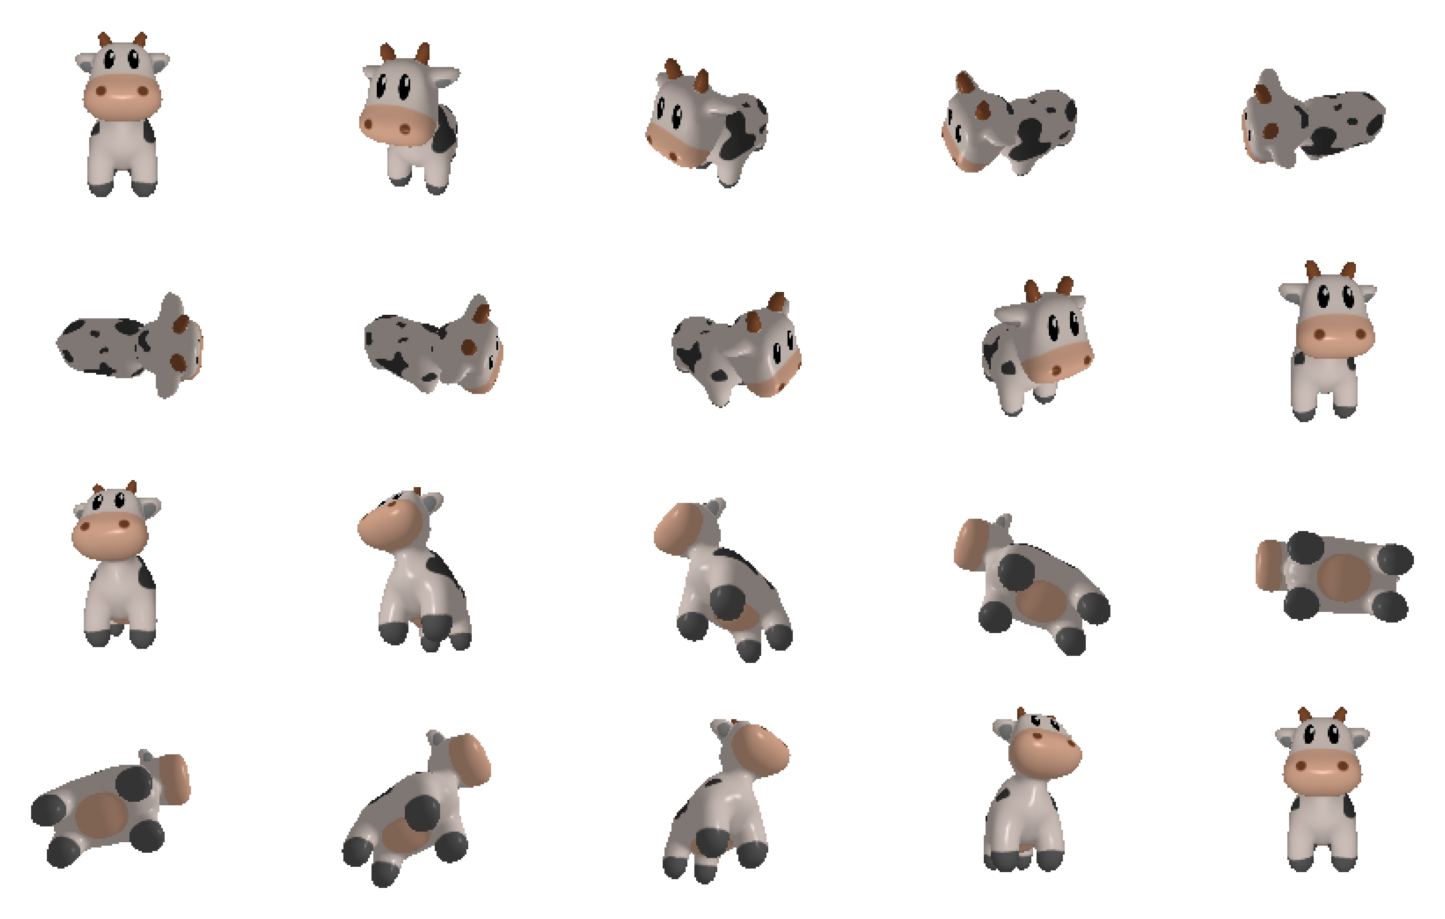

In [ ]:
# RGB images
image_grid(target_images.cpu().numpy(), rows=4, cols=5, rgb=True)
plt.show()

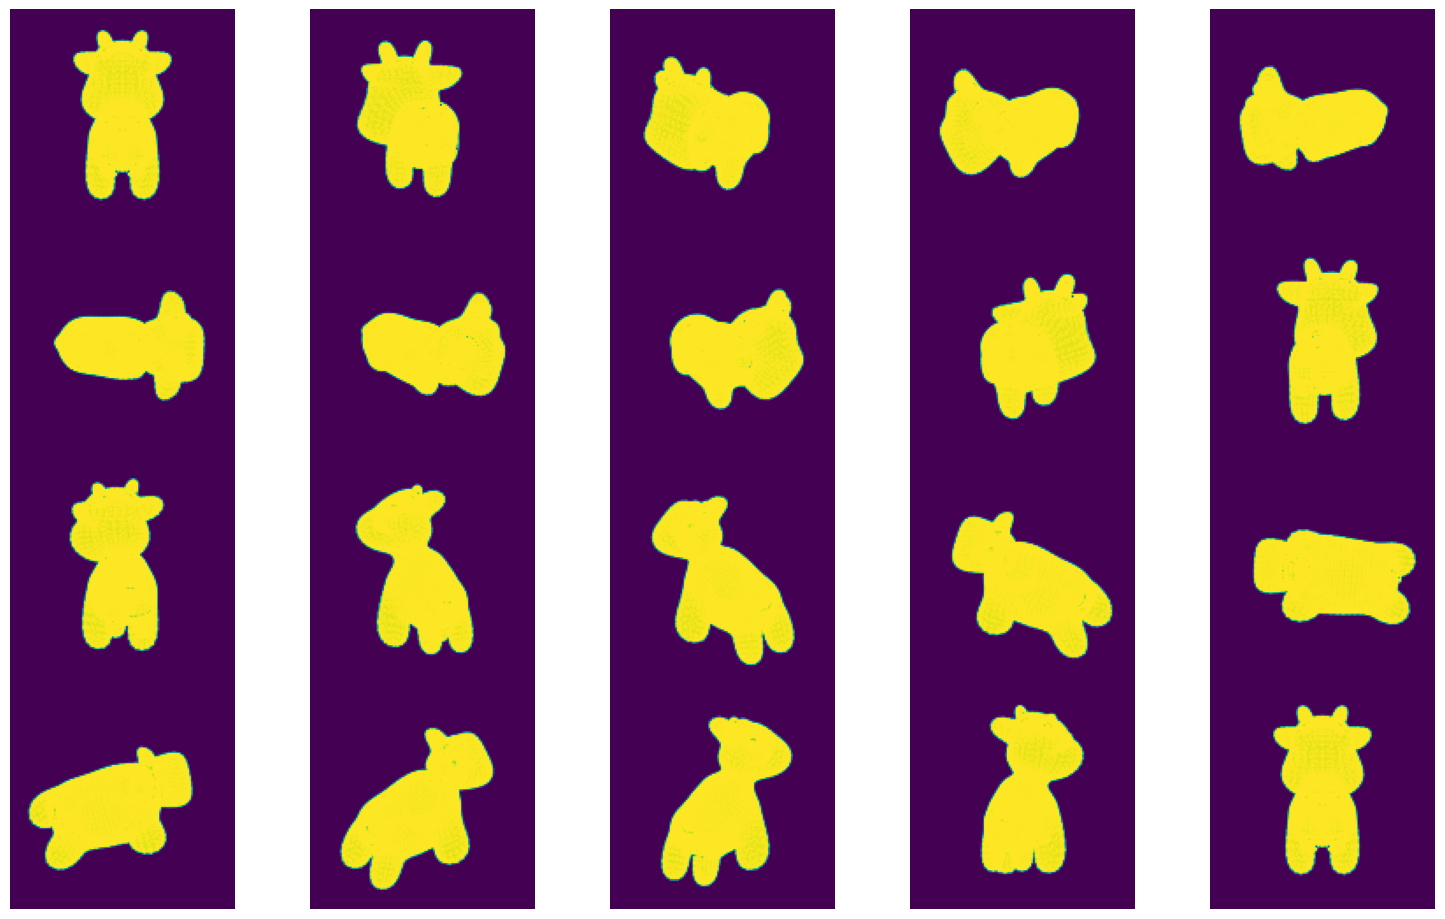

In [ ]:
# Rasterization settings for silhouette rendering
sigma = 1e-4
raster_settings_silhouette = RasterizationSettings(
    image_size=128,
    blur_radius=np.log(1. / 1e-4 - 1.)*sigma,
    faces_per_pixel=50,
)

# Silhouette renderer
renderer_silhouette = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=camera,
        raster_settings=raster_settings_silhouette
    ),
    shader=SoftSilhouetteShader()
)

# Render silhouette images.  The 3rd channel of the rendering output is
# the alpha/silhouette channel
silhouette_images = renderer_silhouette(meshes, cameras=cameras, lights=lights)
target_silhouette = [silhouette_images[i, ..., 3] for i in range(num_views)]

# Visualize silhouette images
image_grid(silhouette_images.cpu().numpy(), rows=4, cols=5, rgb=False)
plt.show()

In [ ]:
# Show a visualization comparing the rendered predicted mesh to the ground truth
# mesh
def visualize_prediction(predicted_mesh, renderer=renderer_silhouette,
                         target_image=target_rgb[1], title='',
                         silhouette=False):
    inds = 3 if silhouette else range(3)
    with torch.no_grad():
        predicted_images = renderer(predicted_mesh)
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(predicted_images[0, ..., inds].cpu().detach().numpy())

    plt.subplot(1, 2, 2)
    plt.imshow(target_image.cpu().detach().numpy())
    plt.title(title)
    plt.axis("off")

# Plot losses as a function of optimization iteration
def plot_losses(losses):
    fig = plt.figure(figsize=(13, 5))
    ax = fig.gca()
    for k, l in losses.items():
        ax.plot(l['values'], label=k + " loss")
    ax.legend(fontsize="16")
    ax.set_xlabel("Iteration", fontsize="16")
    ax.set_ylabel("Loss", fontsize="16")
    ax.set_title("Loss vs iterations", fontsize="16")

In [ ]:
# We initialize the source shape to be a sphere of radius 1.
src_mesh = ico_sphere(4, device)

In [ ]:
# Rasterization settings for differentiable rendering, where the blur_radius
# initialization is based on Liu et al, 'Soft Rasterizer: A Differentiable
# Renderer for Image-based 3D Reasoning', ICCV 2019
sigma = 1e-4
raster_settings_soft = RasterizationSettings(
    image_size=128,
    blur_radius=np.log(1. / 1e-4 - 1.)*sigma,
    faces_per_pixel=50,
)

# Silhouette renderer
renderer_silhouette = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=camera,
        raster_settings=raster_settings_soft
    ),
    shader=SoftSilhouetteShader()
)

In [ ]:
# Number of views to optimize over in each SGD iteration
num_views_per_iteration = 2
# Number of optimization steps
Niter = 2000
# Plot period for the losses
plot_period = 250

%matplotlib inline

# Optimize using rendered silhouette image loss, mesh edge loss, mesh normal
# consistency, and mesh laplacian smoothing
losses = {"silhouette": {"weight": 1.0, "values": []},
          "edge": {"weight": 1.0, "values": []},
          "normal": {"weight": 0.01, "values": []},
          "laplacian": {"weight": 1.0, "values": []},
         }

# Losses to smooth / regularize the mesh shape
def update_mesh_shape_prior_losses(mesh, loss):
    # and (b) the edge length of the predicted mesh
    loss["edge"] = mesh_edge_loss(mesh)

    # mesh normal consistency
    loss["normal"] = mesh_normal_consistency(mesh)

    # mesh laplacian smoothing
    loss["laplacian"] = mesh_laplacian_smoothing(mesh, method="uniform")

# We will learn to deform the source mesh by offsetting its vertices
# The shape of the deform parameters is equal to the total number of vertices in
# src_mesh
verts_shape = src_mesh.verts_packed().shape
deform_verts = torch.full(verts_shape, 0.0, device=device, requires_grad=True)

# The optimizer
optimizer = torch.optim.SGD([deform_verts], lr=1.0, momentum=0.9)

  0%|          | 0/2000 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch3d/ops/laplacian_matrices.py:49: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:618.)
  A = torch.sparse.FloatTensor(idx, ones, (V, V))


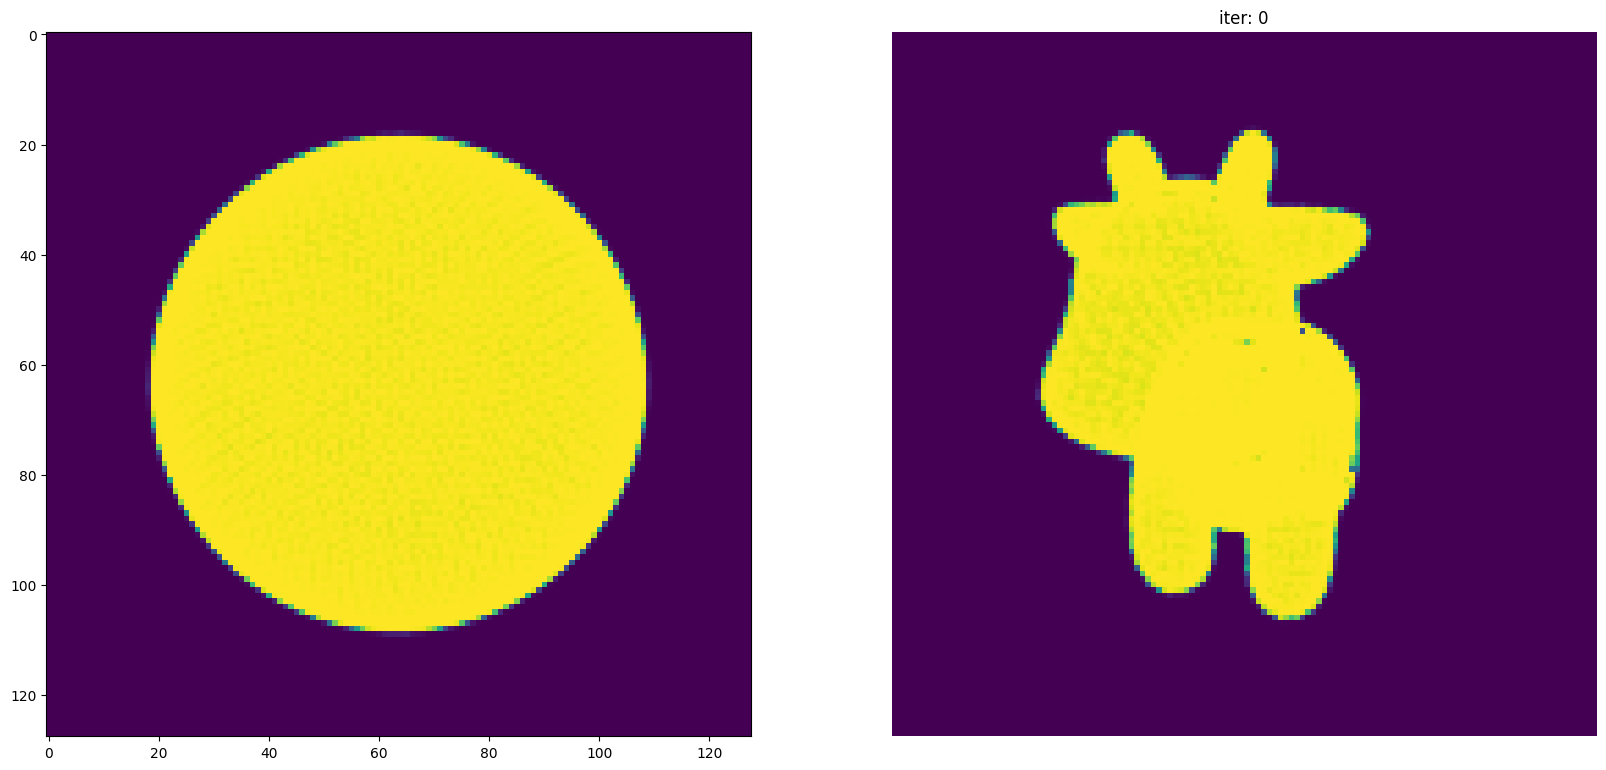

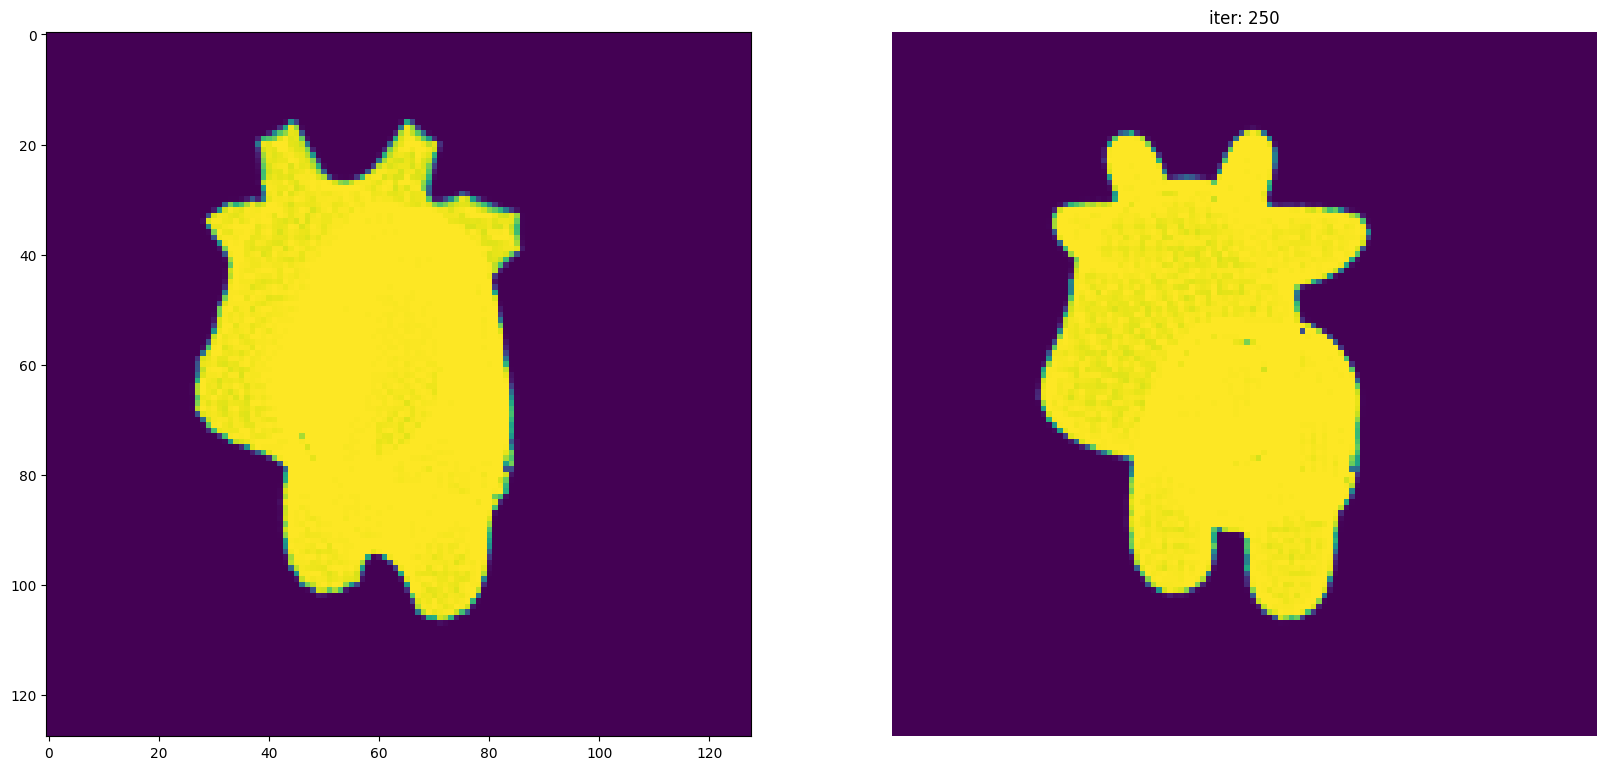

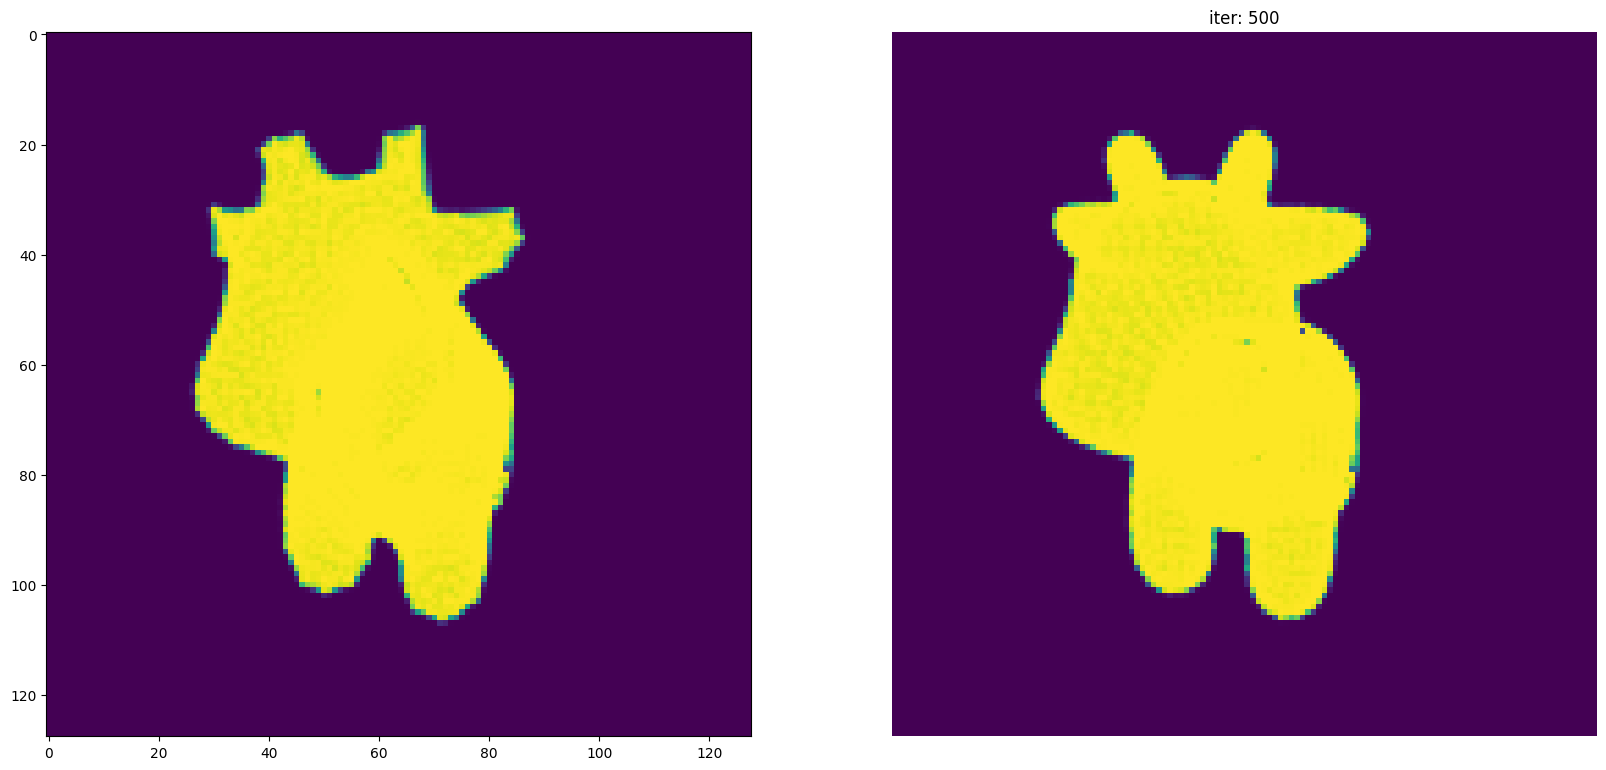

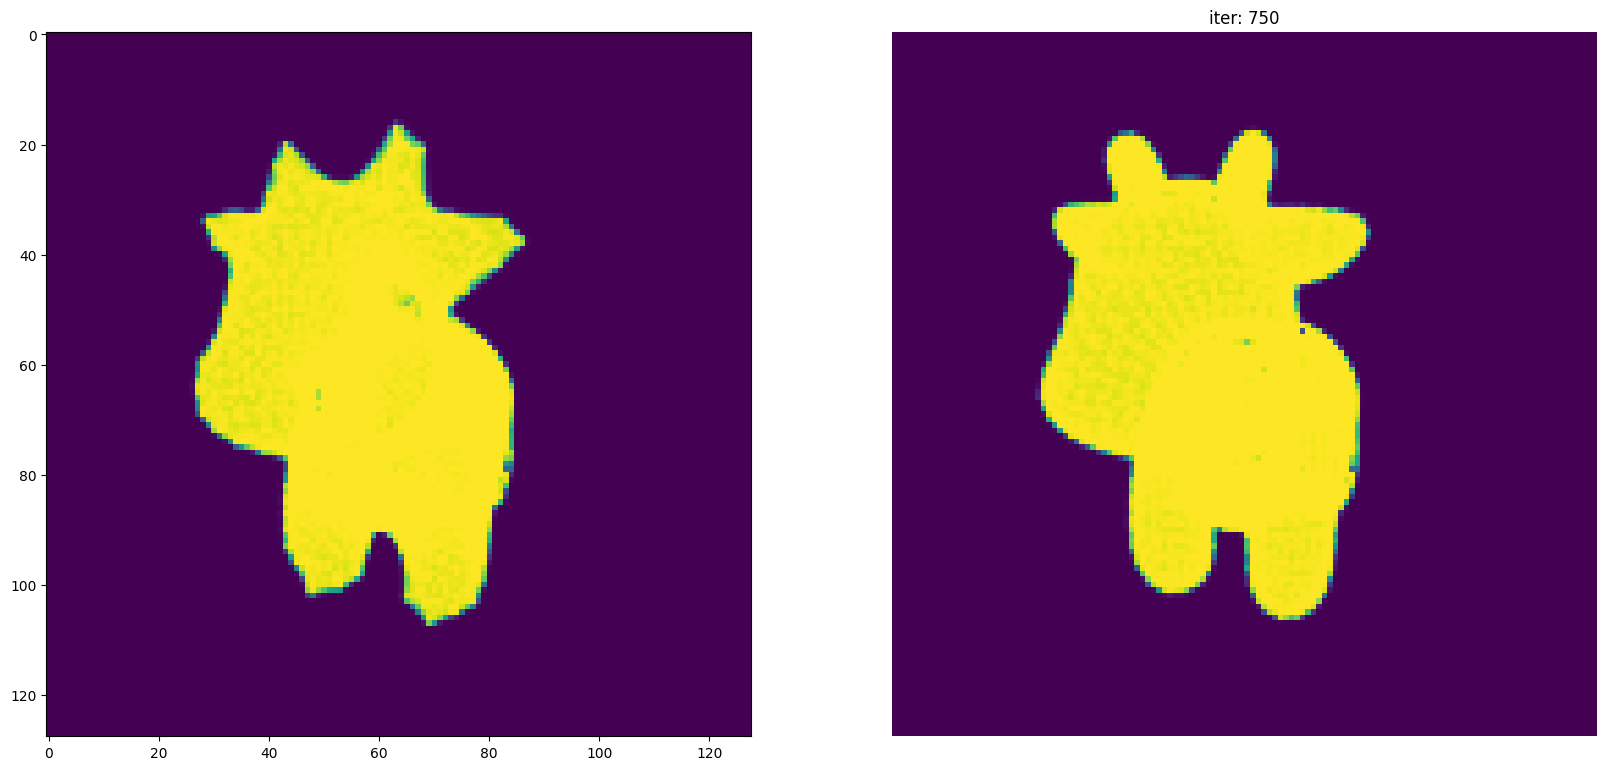

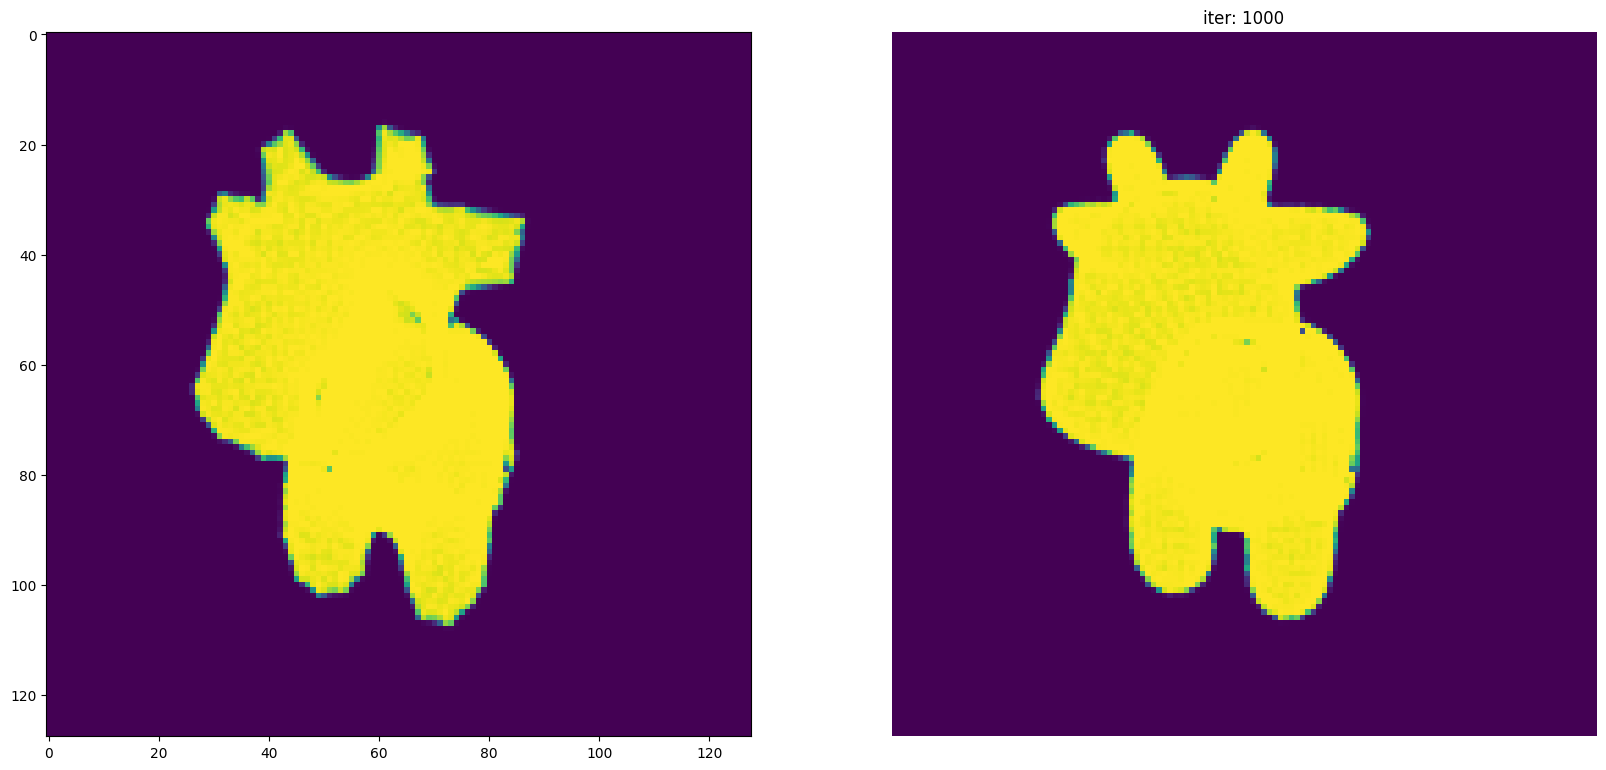

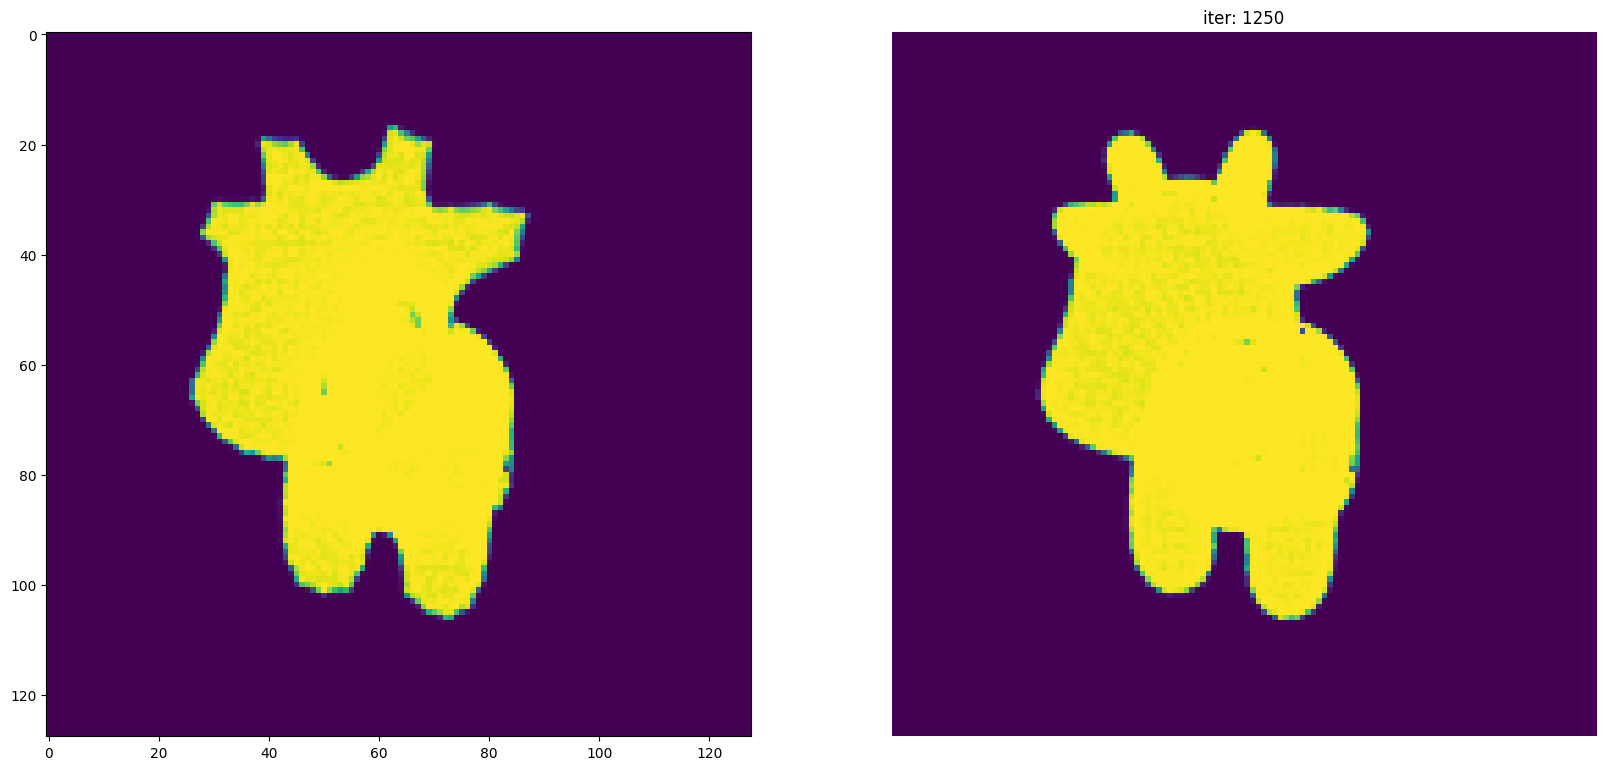

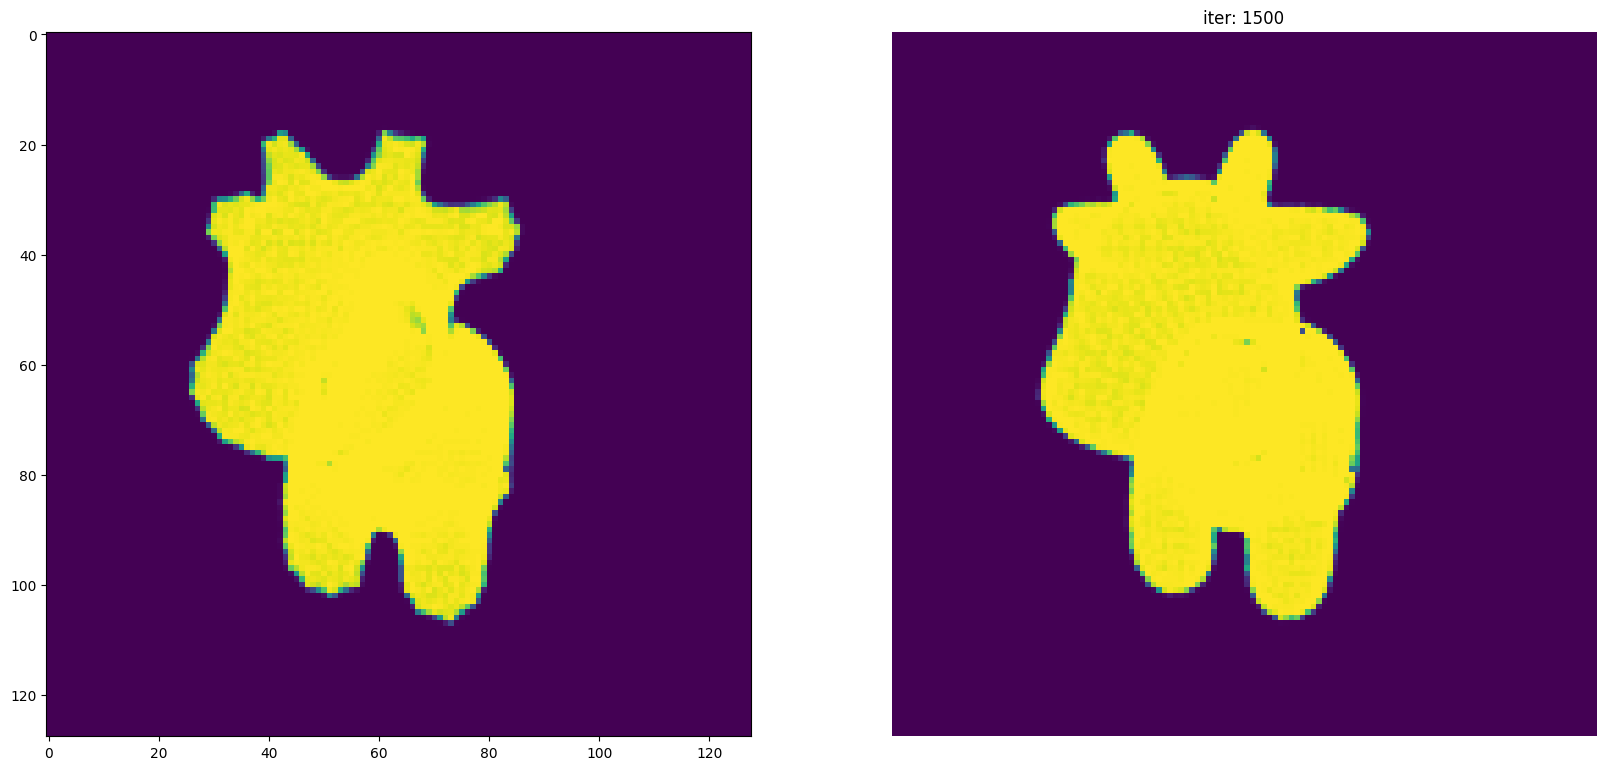

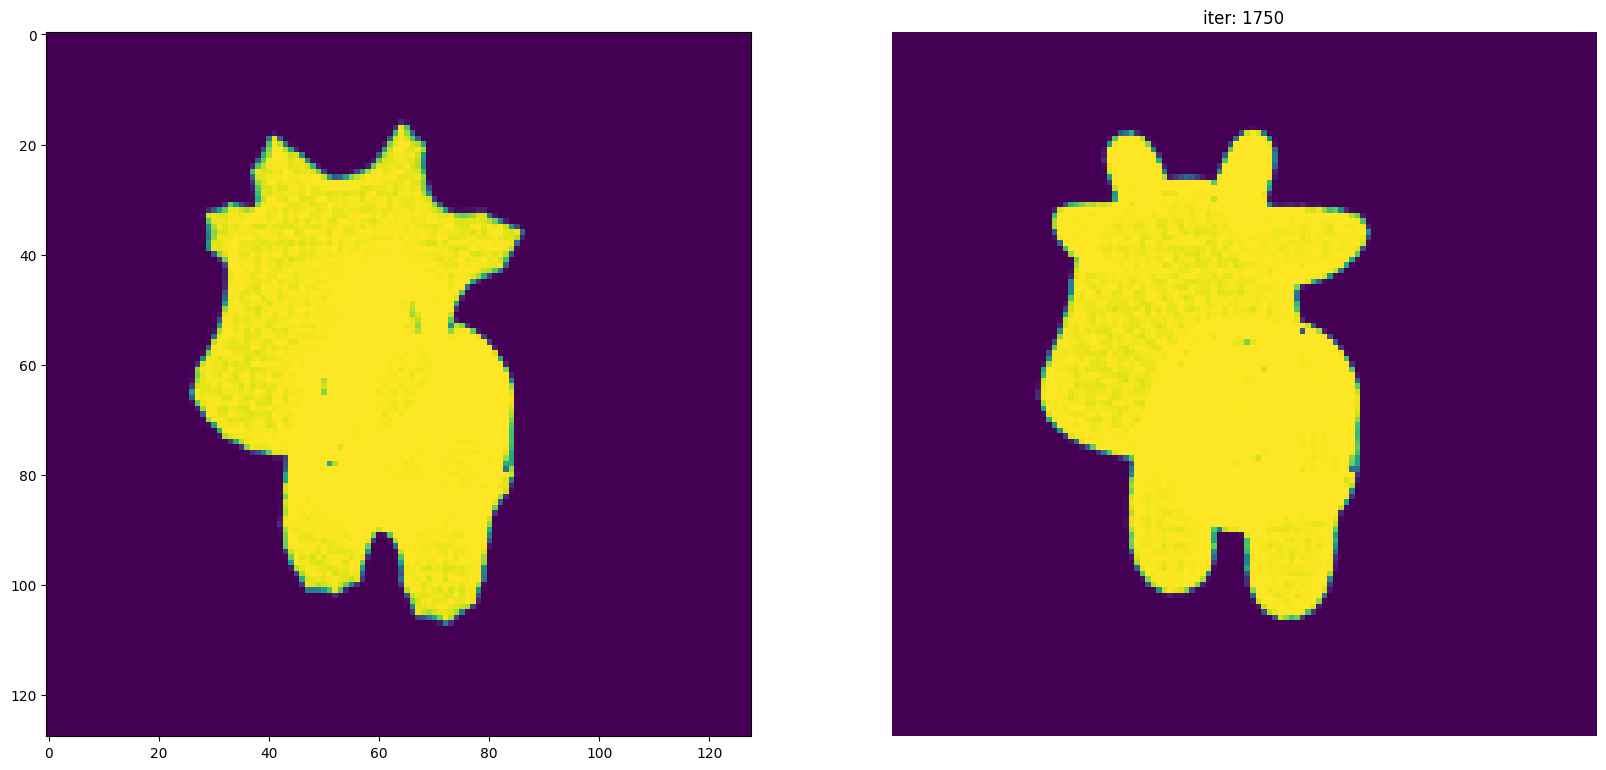

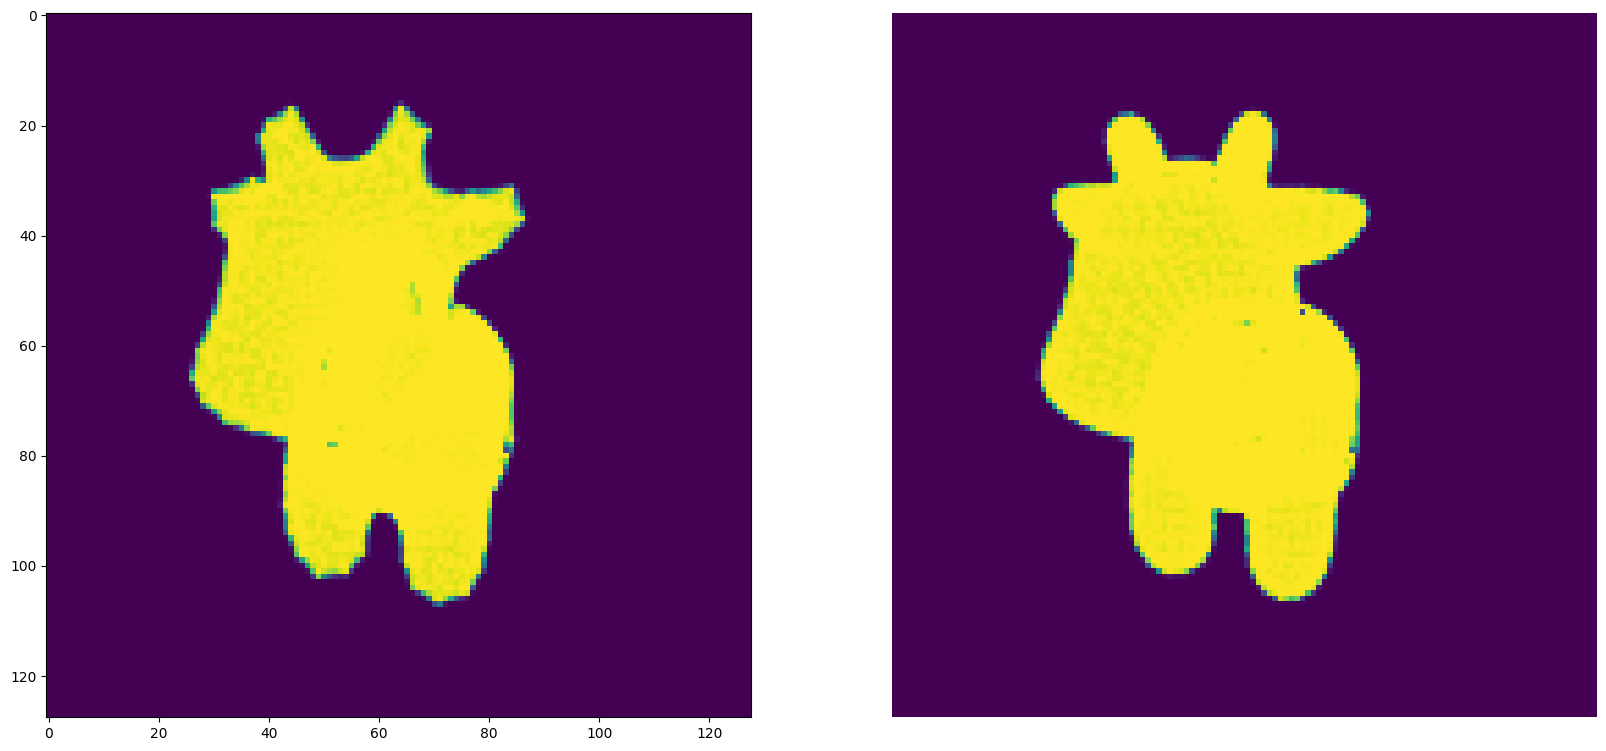

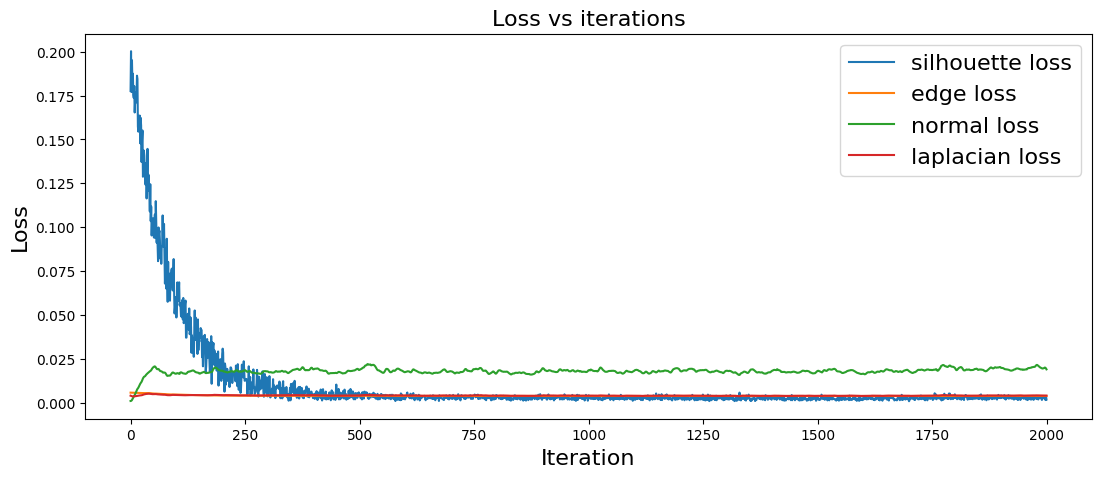

In [ ]:
loop = tqdm(range(Niter))

for i in loop:
    # Initialize optimizer
    optimizer.zero_grad()

    # Deform the mesh
    new_src_mesh = src_mesh.offset_verts(deform_verts)

    # Losses to smooth /regularize the mesh shape
    loss = {k: torch.tensor(0.0, device=device) for k in losses}
    update_mesh_shape_prior_losses(new_src_mesh, loss)

    # Compute the average silhouette loss over two random views, as the average
    # squared L2 distance between the predicted silhouette and the target
    # silhouette from our dataset
    for j in np.random.permutation(num_views).tolist()[:num_views_per_iteration]:
        images_predicted = renderer_silhouette(new_src_mesh, cameras=target_cameras[j], lights=lights)
        predicted_silhouette = images_predicted[..., 3]
        loss_silhouette = ((predicted_silhouette - target_silhouette[j]) ** 2).mean()
        loss["silhouette"] += loss_silhouette / num_views_per_iteration

    # Weighted sum of the losses
    sum_loss = torch.tensor(0.0, device=device)
    for k, l in loss.items():
        sum_loss += l * losses[k]["weight"]
        losses[k]["values"].append(float(l.detach().cpu()))


    # Print the losses
    loop.set_description("total_loss = %.6f" % sum_loss)

    # Plot mesh
    if i % plot_period == 0:
        visualize_prediction(new_src_mesh, title="iter: %d" % i, silhouette=True,
                             target_image=target_silhouette[1])

    # Optimization step
    sum_loss.backward()
    optimizer.step()
visualize_prediction(new_src_mesh, silhouette=True,
                     target_image=target_silhouette[1])
plot_losses(losses)

In [ ]:
# Rasterization settings for differentiable rendering, where the blur_radius
# initialization is based on Liu et al, 'Soft Rasterizer: A Differentiable
# Renderer for Image-based 3D Reasoning', ICCV 2019
sigma = 1e-4
raster_settings_soft = RasterizationSettings(
    image_size=128,
    blur_radius=np.log(1. / 1e-4 - 1.)*sigma,
    faces_per_pixel=50,
    perspective_correct=False,
)

# Differentiable soft renderer using per vertex RGB colors for texture
renderer_textured = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=camera,
        raster_settings=raster_settings_soft
    ),
    shader=SoftPhongShader(device=device,
        cameras=camera,
        lights=lights)
)

In [ ]:
# Number of views to optimize over in each SGD iteration
num_views_per_iteration = 2
# Number of optimization steps
Niter = 2000
# Plot period for the losses
plot_period = 250

%matplotlib inline

# Optimize using rendered RGB image loss, rendered silhouette image loss, mesh
# edge loss, mesh normal consistency, and mesh laplacian smoothing
losses = {"rgb": {"weight": 1.0, "values": []},
          "silhouette": {"weight": 1.0, "values": []},
          "edge": {"weight": 1.0, "values": []},
          "normal": {"weight": 0.01, "values": []},
          "laplacian": {"weight": 1.0, "values": []},
         }

# We will learn to deform the source mesh by offsetting its vertices
# The shape of the deform parameters is equal to the total number of vertices in
# src_mesh
verts_shape = src_mesh.verts_packed().shape
deform_verts = torch.full(verts_shape, 0.0, device=device, requires_grad=True)

# We will also learn per vertex colors for our sphere mesh that define texture
# of the mesh
sphere_verts_rgb = torch.full([1, verts_shape[0], 3], 0.5, device=device, requires_grad=True)

# The optimizer
optimizer = torch.optim.SGD([deform_verts, sphere_verts_rgb], lr=1.0, momentum=0.9)

  0%|          | 0/2000 [00:00<?, ?it/s]

tensor(0.1277, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0185, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0190, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0188, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0170, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0152, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0146, device='cuda:0', grad_fn=<MeanBackward0>)


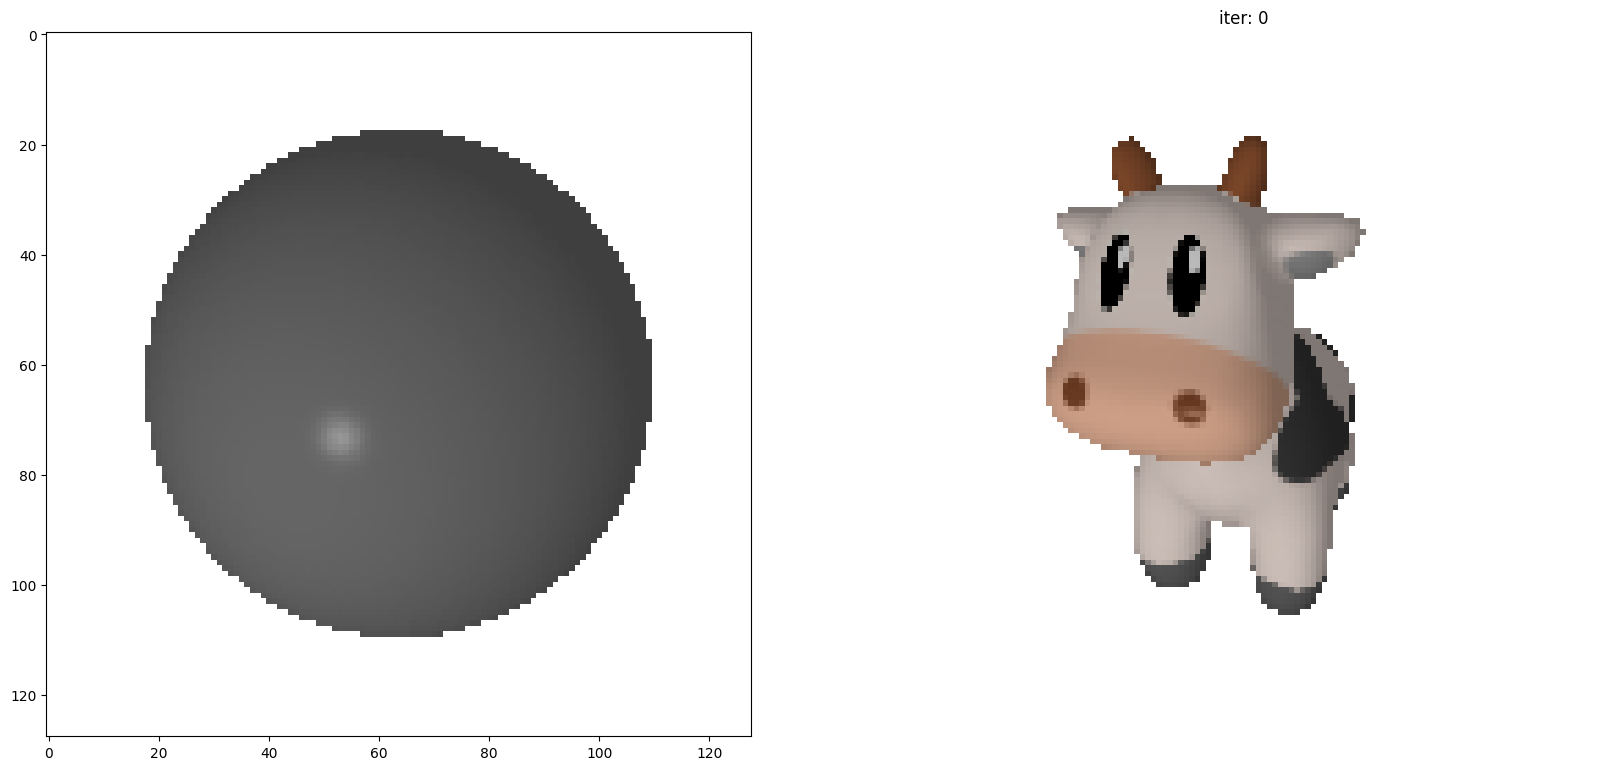

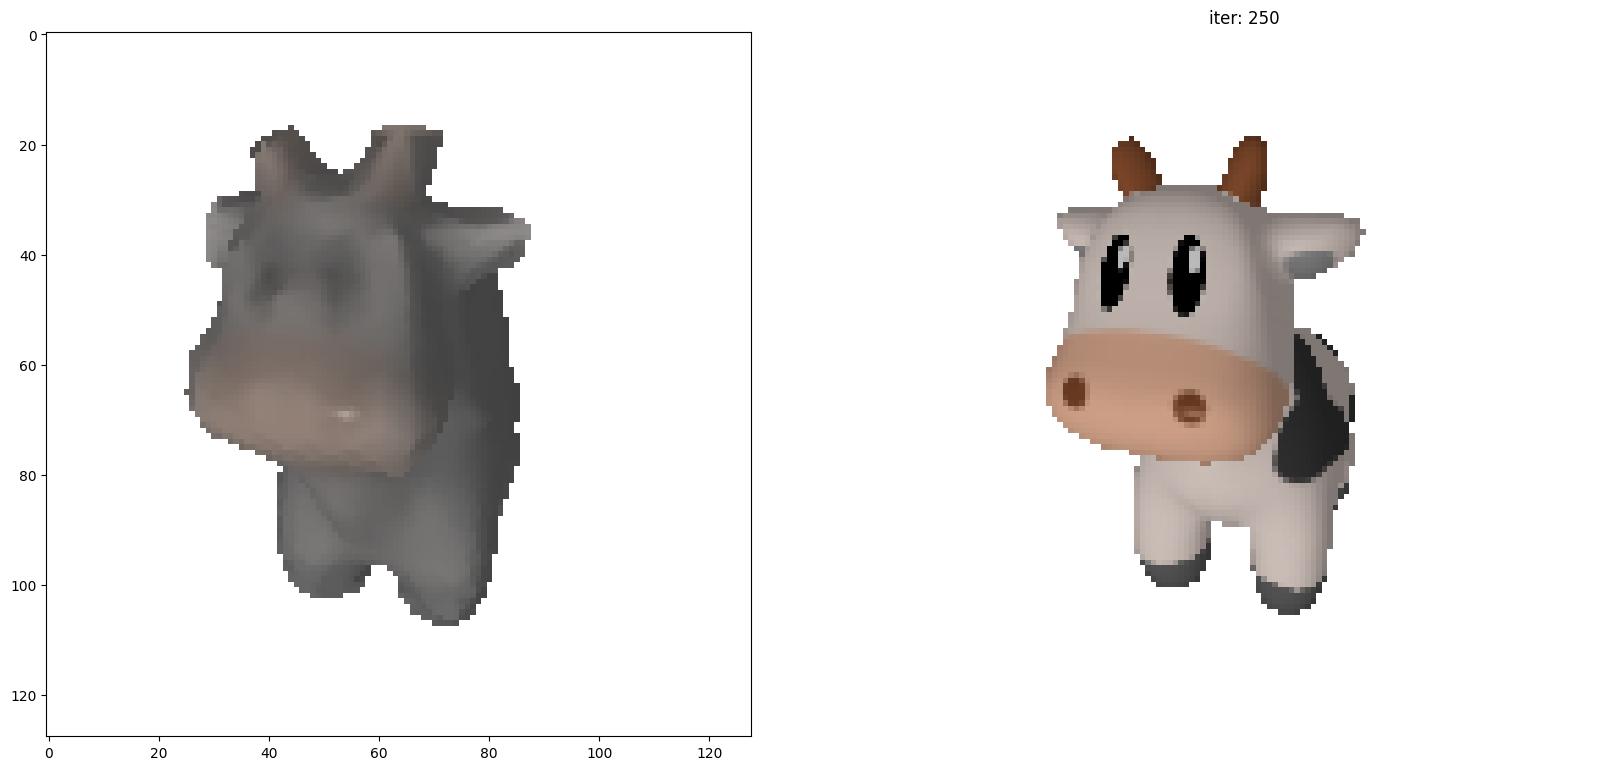

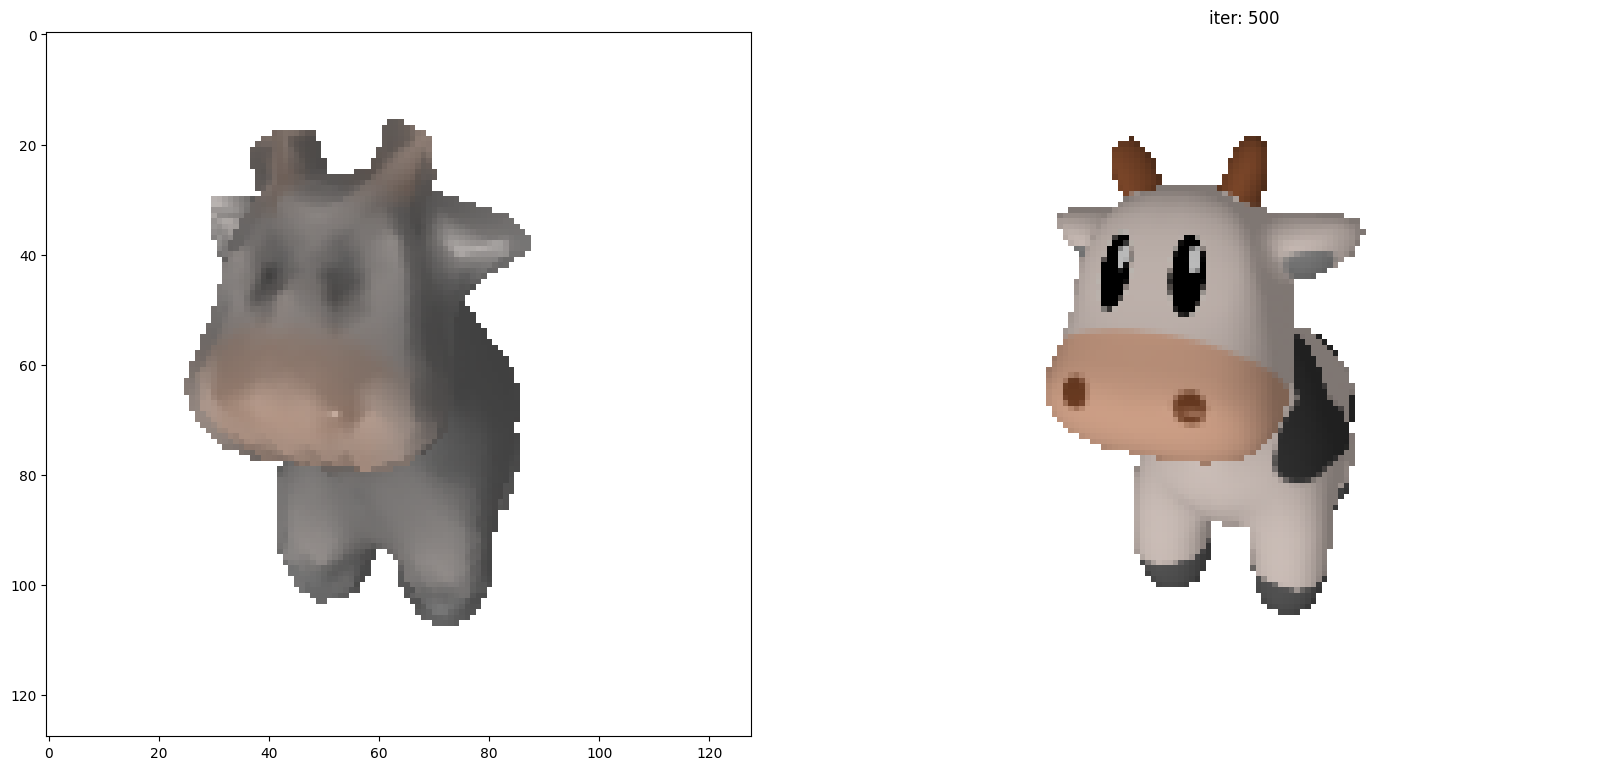

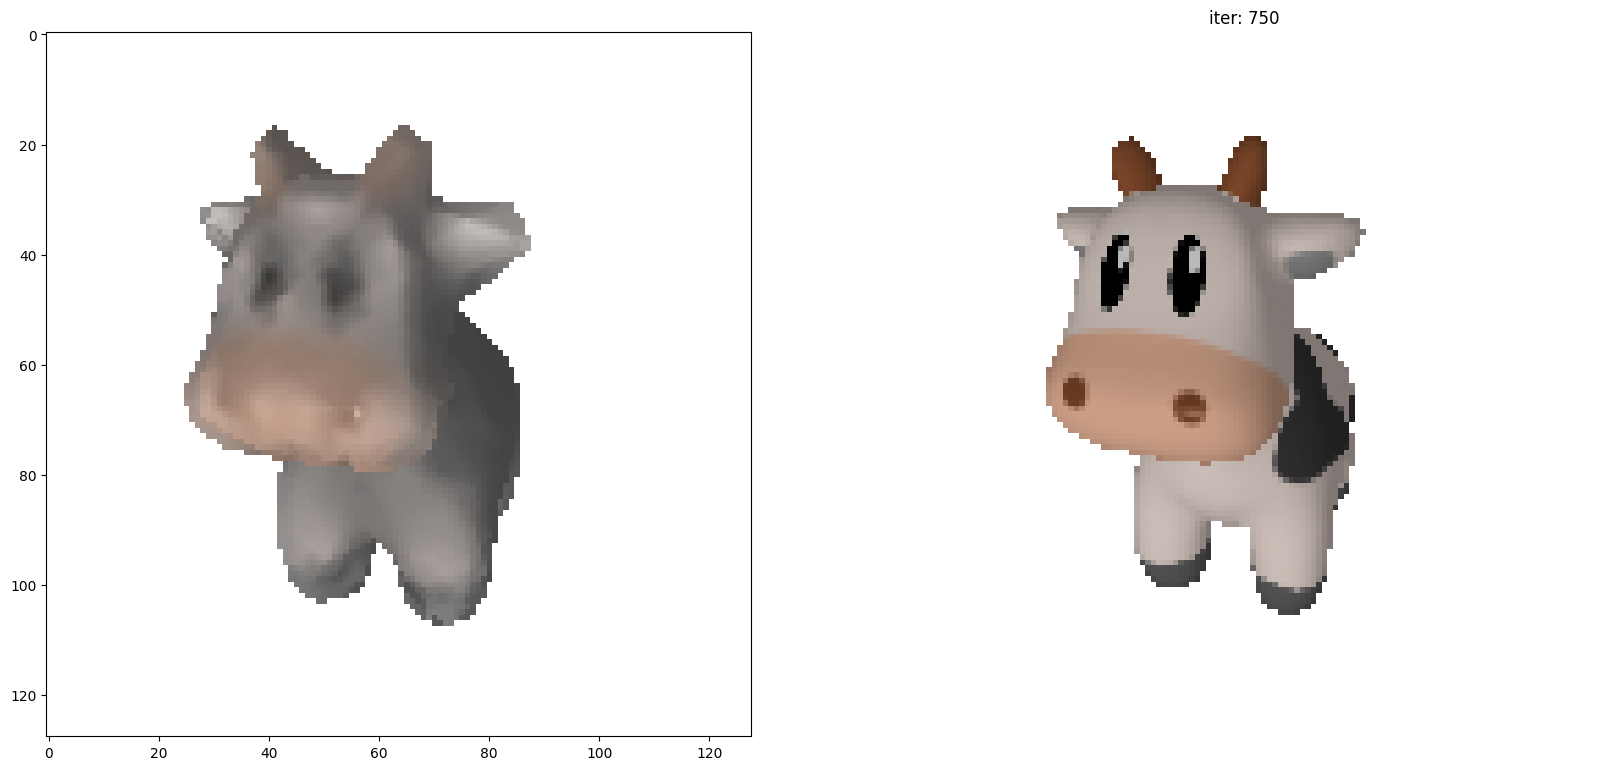

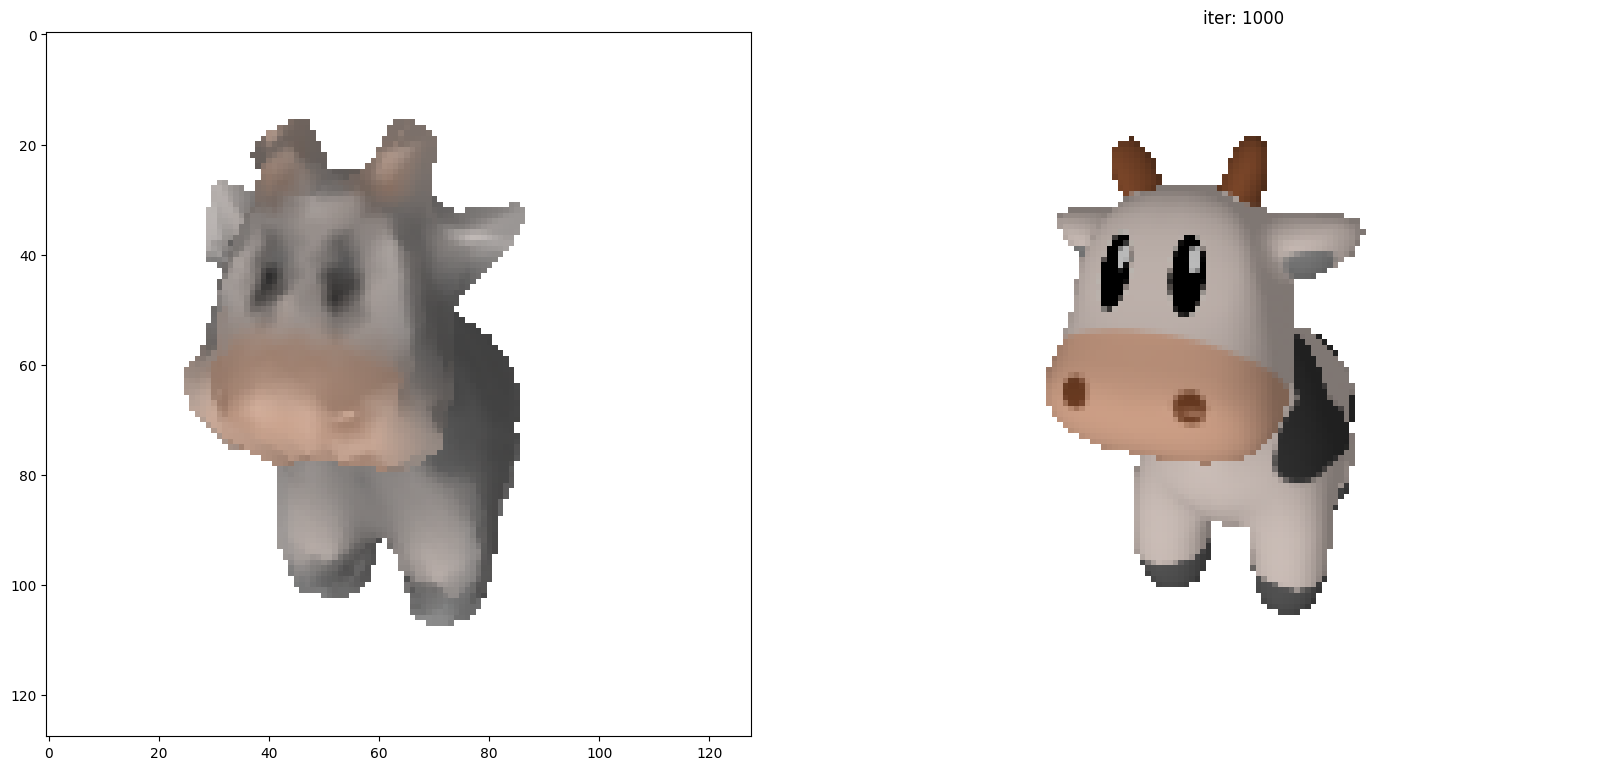

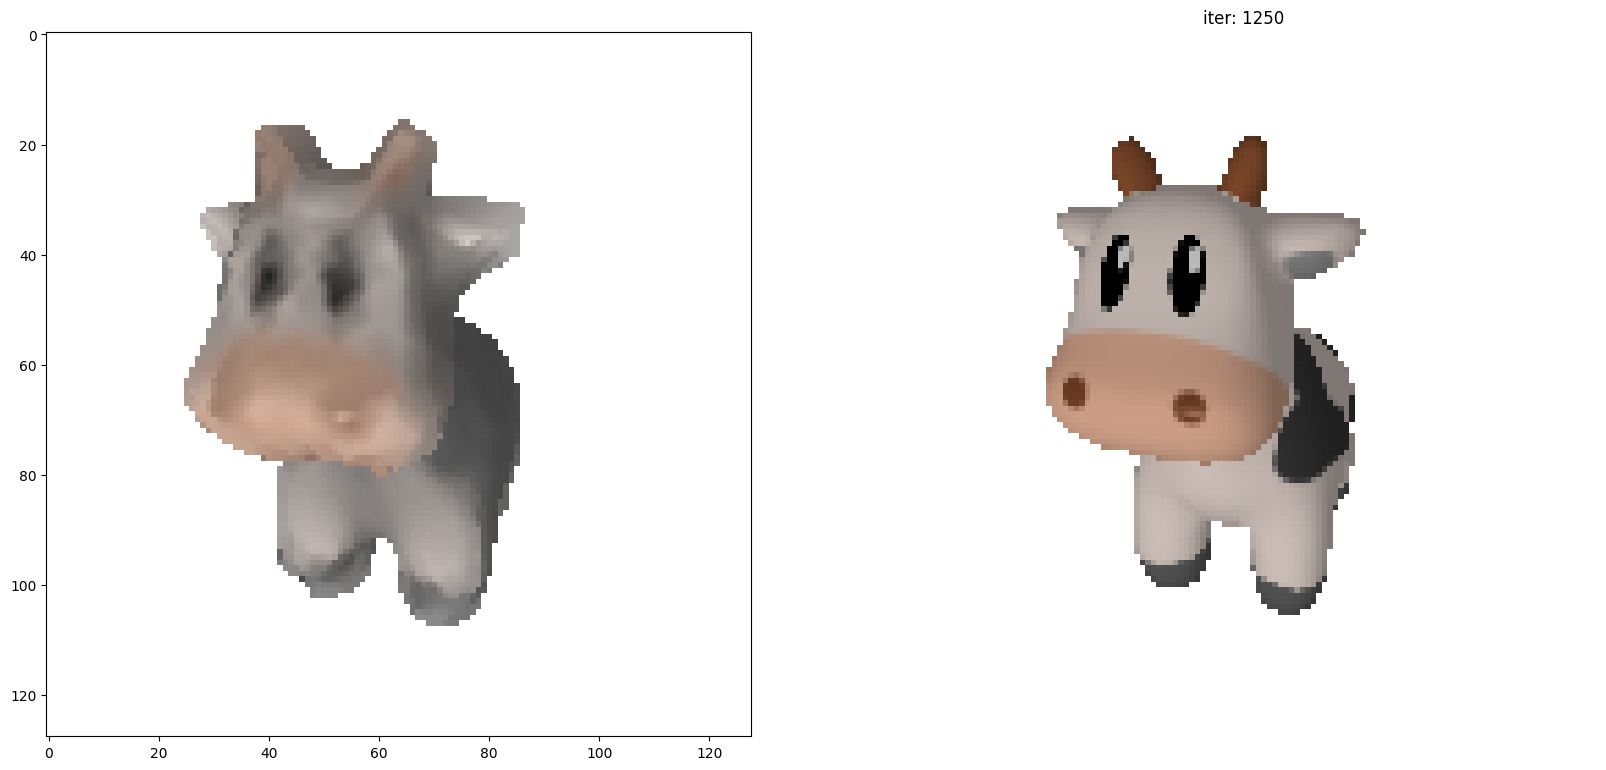

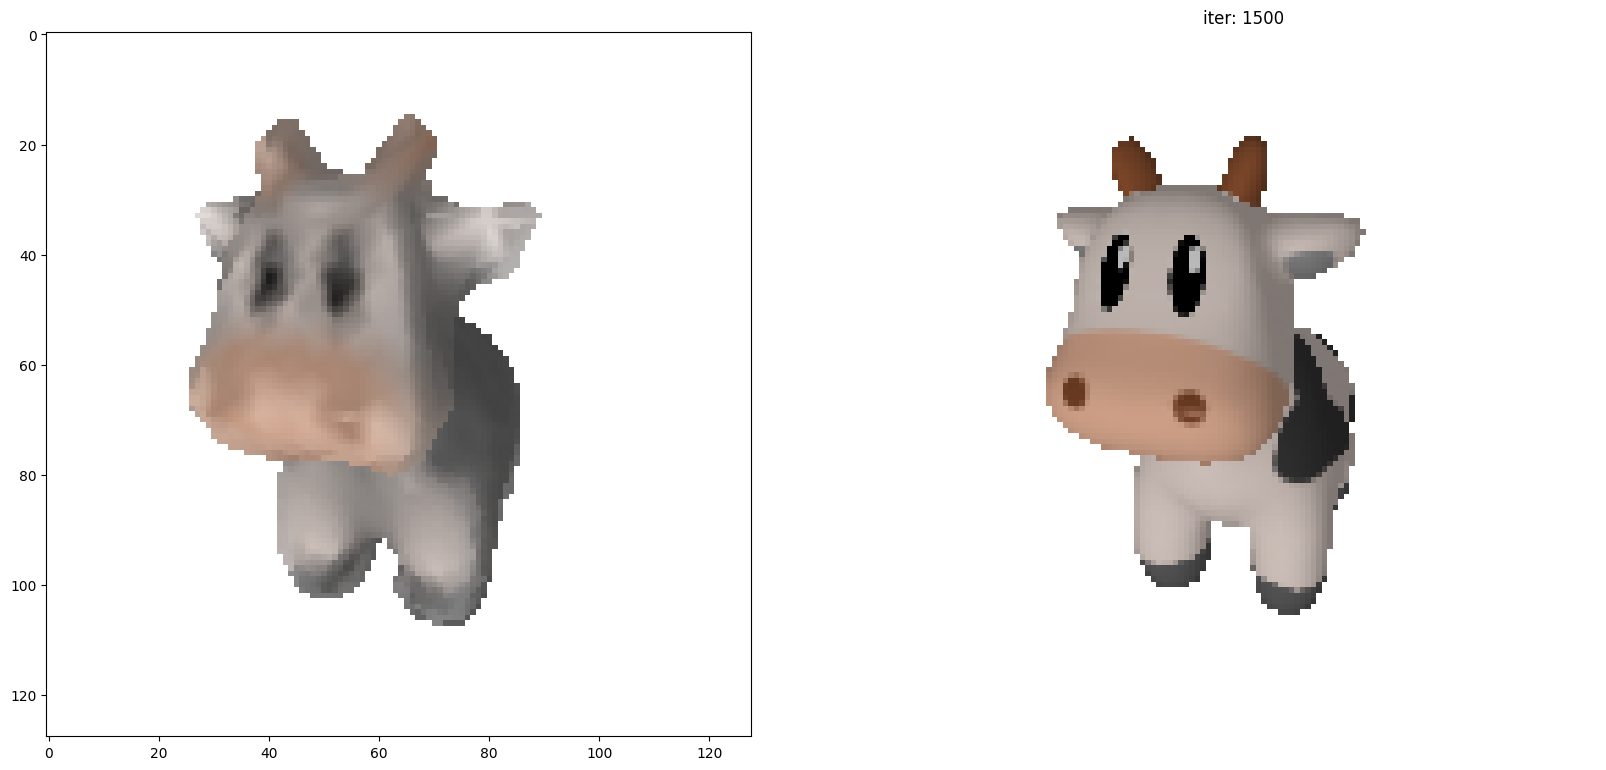

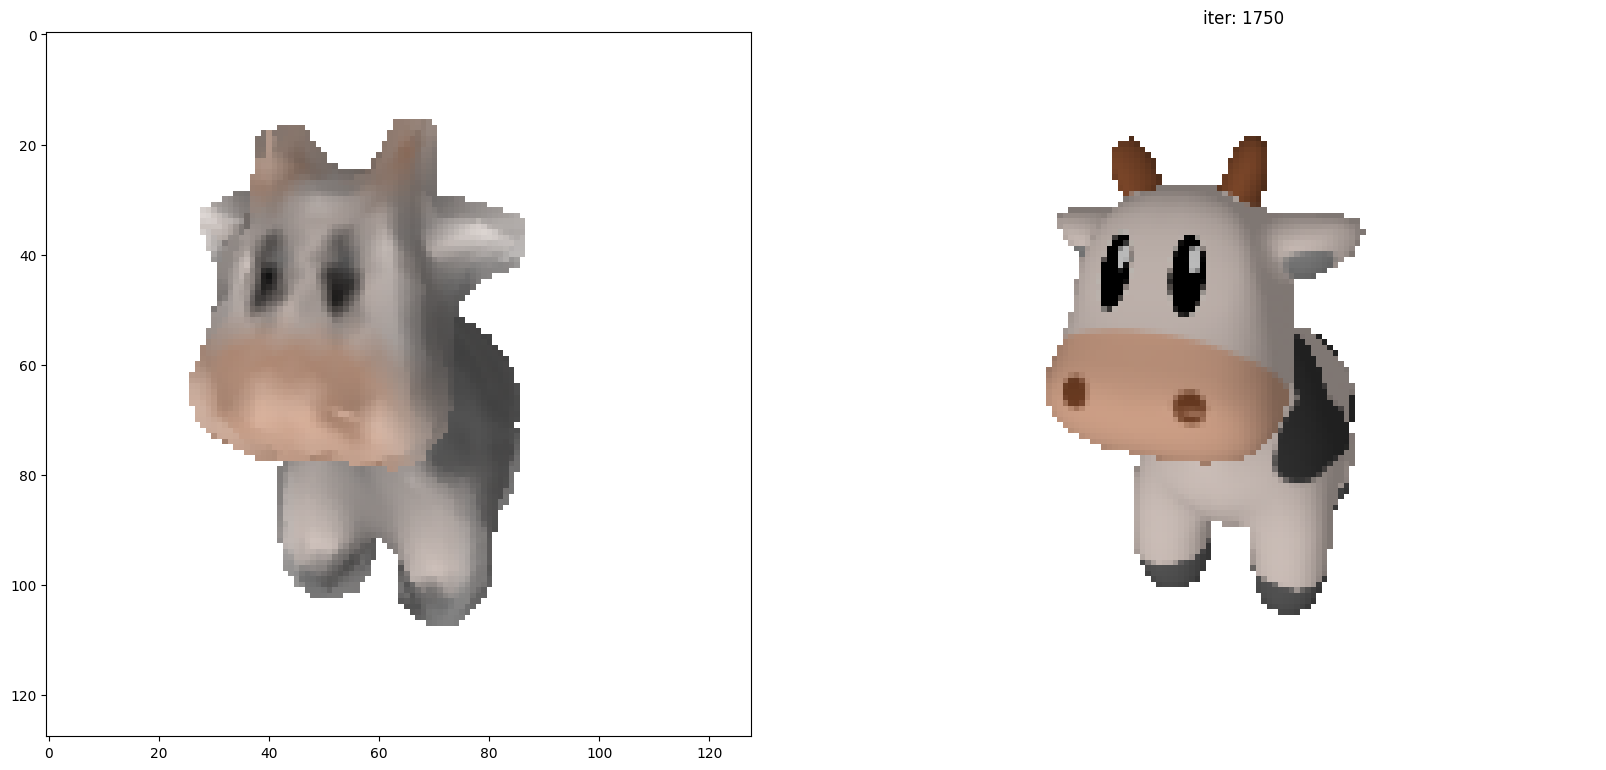

In [ ]:
loop = tqdm(range(Niter))

for i in loop:
    # Initialize optimizer
    optimizer.zero_grad()

    # Deform the mesh
    new_src_mesh = src_mesh.offset_verts(deform_verts)

    # Add per vertex colors to texture the mesh
    new_src_mesh.textures = TexturesVertex(verts_features=sphere_verts_rgb)

    # Losses to smooth /regularize the mesh shape
    loss = {k: torch.tensor(0.0, device=device) for k in losses}
    update_mesh_shape_prior_losses(new_src_mesh, loss)

    # Randomly select two views to optimize over in this iteration.  Compared
    # to using just one view, this helps resolve ambiguities between updating
    # mesh shape vs. updating mesh texture
    for j in np.random.permutation(num_views).tolist()[:num_views_per_iteration]:
        images_predicted = renderer_textured(new_src_mesh, cameras=target_cameras[j], lights=lights)

        # Squared L2 distance between the predicted silhouette and the target
        # silhouette from our dataset
        predicted_silhouette = images_predicted[..., 3]
        loss_silhouette = ((predicted_silhouette - target_silhouette[j]) ** 2).mean()
        loss["silhouette"] += loss_silhouette / num_views_per_iteration

        # Squared L2 distance between the predicted RGB image and the target
        # image from our dataset
        predicted_rgb = images_predicted[..., :3]
        loss_rgb = ((predicted_rgb - target_rgb[j]) ** 2).mean()
        loss["rgb"] += loss_rgb / num_views_per_iteration

    # Weighted sum of the losses
    sum_loss = torch.tensor(0.0, device=device)
    for k, l in loss.items():
        sum_loss += l * losses[k]["weight"]
        losses[k]["values"].append(float(l.detach().cpu()))

    # Print the losses
    loop.set_description("total_loss = %.6f" % sum_loss)

    # Plot mesh
    if i % plot_period == 0:
        print(loss_rgb)
        visualize_prediction(new_src_mesh, renderer=renderer_textured, title="iter: %d" % i, silhouette=False)

    # Optimization step
    sum_loss.backward()
    optimizer.step()

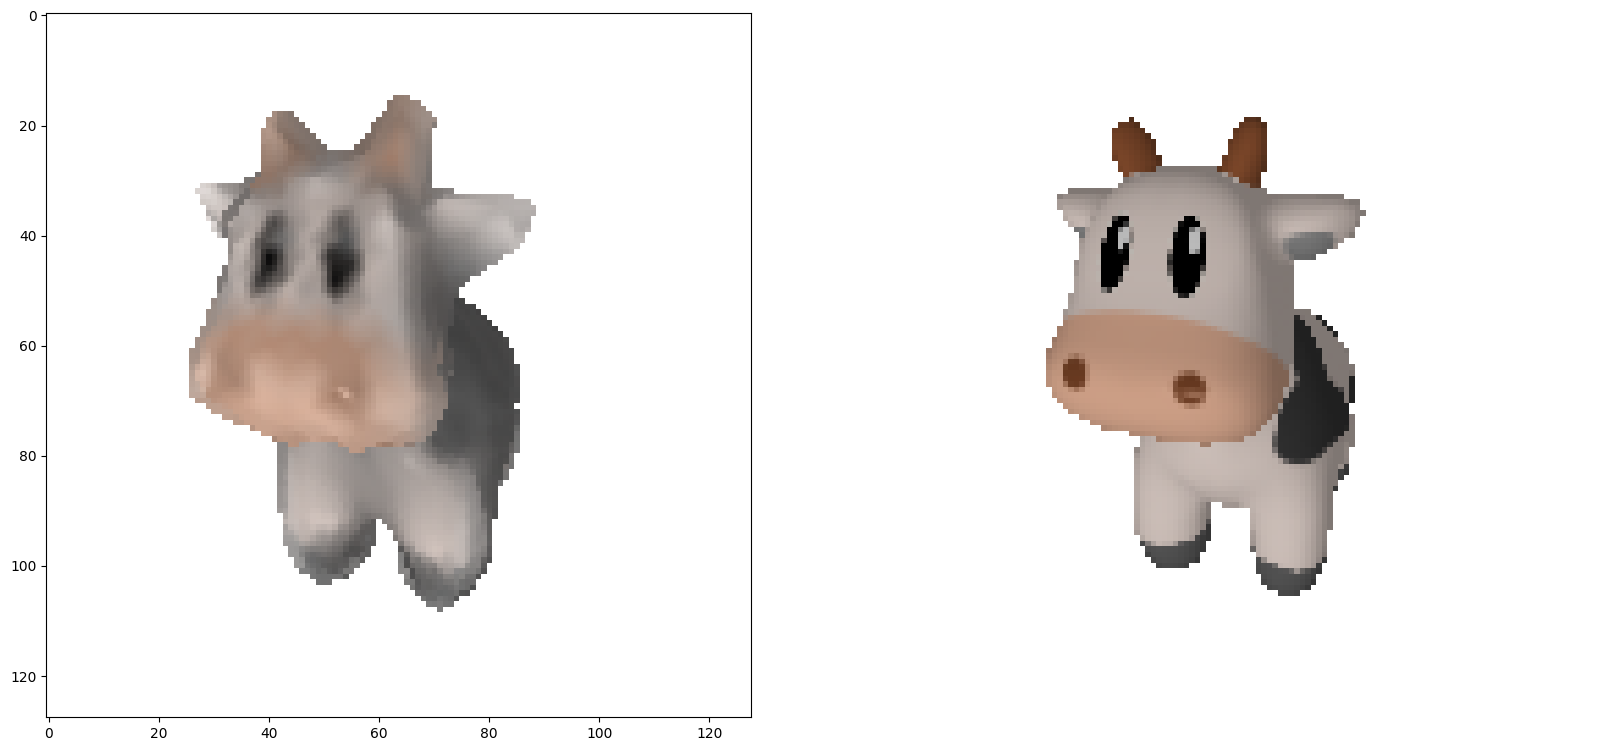

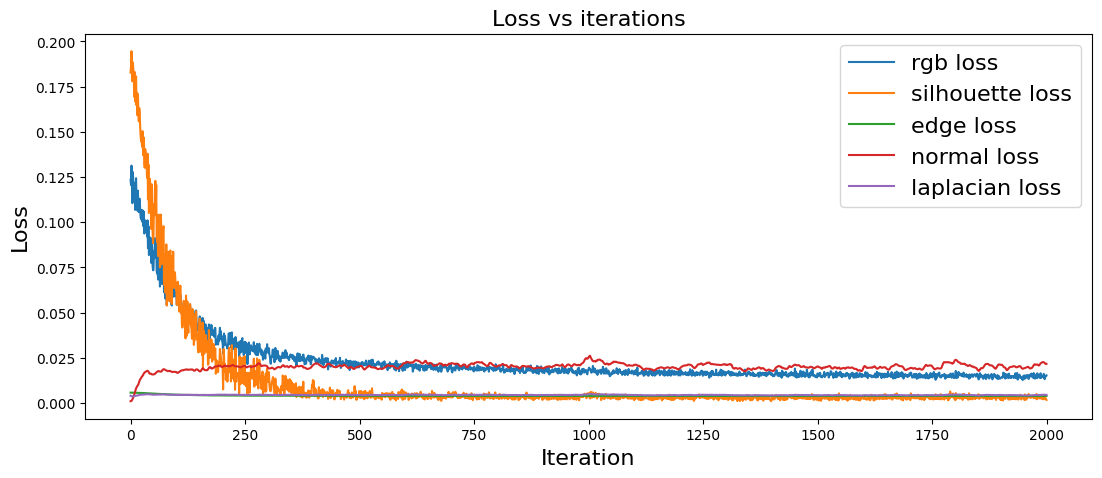

In [ ]:
visualize_prediction(new_src_mesh, renderer=renderer_textured, silhouette=False)
plot_losses(losses)

In [ ]:
# Fetch the verts and faces of the final predicted mesh
final_verts, final_faces = new_src_mesh.get_mesh_verts_faces(0)

# Scale normalize back to the original target size
final_verts = final_verts * scale + center

# Store the predicted mesh using save_obj
final_obj = os.path.join('./', 'final_model.obj')
save_obj(final_obj, final_verts, final_faces)

###sd